In [1]:

# monitor training performance
from numpy import loadtxt
from numpy import genfromtxt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
from matplotlib import pyplot

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import sklearn.metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [5]:

import tensorflow as tf

In [6]:
def score(m, x_train, y_train, x_val, y_val, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_val)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_val, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_val, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_val, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_val, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_val, pred)}")

In [7]:
dataset = pd.read_csv(r"D:\學璟\毒物\20230717_改\NEW_DRUGS_noCN-CS.csv")

Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, stratify=Y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=44, stratify=y_trainval,shuffle=True)

SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

smote = SMOTE(random_state=2022,sampling_strategy=0.3)
X_train_smote, y_train_smote = smote.fit_resample(X_trainval, y_trainval)

print(pd.Series(y_train_smote).value_counts())

0    864
1    259
dtype: int64


In [102]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'param_subsample', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


XGB_SMOTE

最佳AUC: 0.7381647682701152，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.6, 'max_depth': 5, 'min_child_weight': 7, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
訓練集平均AUC: 0.8807135048354736, 標準差: 0.007827616732593258, 驗證集平均AUC: 0.7381647682701152, 標準差: 0.050451012308525625, 參數組合: {'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.6, 'max_depth': 5, 'min_child_weight': 7, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
[0]	validation_0-auc:0.63264
[1]	validation_0-auc:0.63372
[2]	validation_0-auc:0.63337
[3]	validation_0-auc:0.63206
[4]	validation_0-auc:0.66147
[5]	validation_0-auc:0.66127
[6]	validation_0-auc:0.66134
[7]	validation_0-auc:0.70501
[8]	validation_0-auc:0.70586
[9]	validation_0-auc:0.70507
[10]	validation_0-auc:0.7

D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-auc:0.83271
[38]	validation_0-auc:0.83266
[39]	validation_0-auc:0.83250
[40]	validation_0-auc:0.83521
[41]	validation_0-auc:0.83542
[42]	validation_0-auc:0.83558
[43]	validation_0-auc:0.83487
[44]	validation_0-auc:0.83938
[45]	validation_0-auc:0.84065
[46]	validation_0-auc:0.84095
[47]	validation_0-auc:0.84230
[48]	validation_0-auc:0.84146
[49]	validation_0-auc:0.84152
[50]	validation_0-auc:0.84195
[51]	validation_0-auc:0.84194
[52]	validation_0-auc:0.84197
[53]	validation_0-auc:0.84207
[54]	validation_0-auc:0.84208
[55]	validation_0-auc:0.84764
[56]	validation_0-auc:0.84929
[57]	validation_0-auc:0.85377
[58]	validation_0-auc:0.85385
[59]	validation_0-auc:0.85408
[60]	validation_0-auc:0.85715
[61]	validation_0-auc:0.85714
[62]	validation_0-auc:0.86136
[63]	validation_0-auc:0.86144
[64]	validation_0-auc:0.86151
[65]	validation_0-auc:0.86172
[66]	validation_0-auc:0.86369
[67]	validation_0-auc:0.86366
[68]	validation_0-auc:0.86436
[69]	validation_0-auc:0.86437
[70]	valid

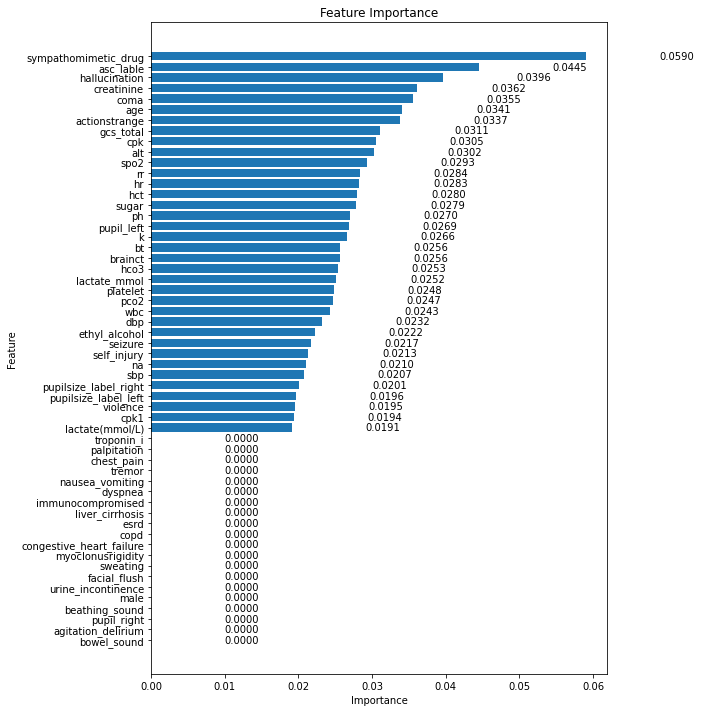

In [9]:
params = {'booster': ['dart'], 
          'max_depth': [5], 
          'learning_rate': [0.1], 
          'objective': ['binary:logistic'], 
          'sample_type': ['uniform'], 
          'normalize_type': ['tree'], 
          'rate_drop': [0.3], 
          'skip_drop': [0.5],
          'eta' : [0.1],
          'gamma': [5],
          'min_child_weight': [7],
          'max_delta_step': [0.6],
          'subsample': [0.8]
        }

xg =  XGBClassifier()
grid = GridSearchCV(xg, params, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True)


grid.fit(X_train_smote, y_train_smote)
best_params = grid.best_params_

# 評估，打分數
print(f"最佳AUC: {grid.best_score_}，最佳參數組合：{grid.best_params_}")
# 取得 cross validation 的平均準確率及標準差

means_train = grid.cv_results_['mean_train_score']
stds_train = grid.cv_results_['std_train_score']
means_val = grid.cv_results_['mean_test_score']
stds_val = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")

# 最佳AUC: 0.7656530606803611，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.6, 'max_depth': 5, 'min_child_weight': 7, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
model = XGBClassifier(**best_params)


eval_set = [(X_train_smote, y_train_smote)]

model.fit(X_train_smote, y_train_smote, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set, verbose=True) #auc

y_pred = model.predict(X_val)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_val, predictions)
# 轉換X為DataFrame物件
l = pd.DataFrame(X, columns=dataset.columns[1:])

# 取得特徵重要性
importance = model.feature_importances_

# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': l.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# 設定圖表大小
plt.figure(figsize=(10, 10))

# 繪製特徵重要性長條圖
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# 反轉Y軸，讓重要性高的項目顯示在上方
plt.gca().invert_yaxis()

# 顯示特徵重要性數值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

# 調整Y軸刻度標籤
plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()



y_pred_proba_train = model.predict_proba(X_train_smote)
fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])
y_pred_proba_test = model.predict_proba(X_test)
auc_train = sklearn.metrics.auc(fpr_train, tpr_train)
fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])


# 使用模型進行預測
y_pred = model.predict(X_test)

auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)


xgb_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用


In [20]:
best_params
# 評估，打分數
print(f"最佳AUC: {grid.best_score_}，最佳參數組合：{grid.best_params_}")

最佳AUC: 0.7656530606803611，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.6, 'max_depth': 5, 'min_child_weight': 7, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}


D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7866666666666666


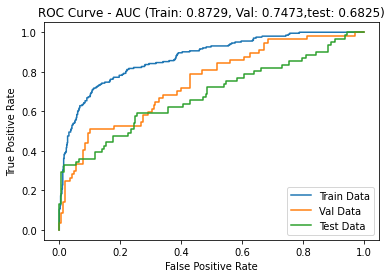

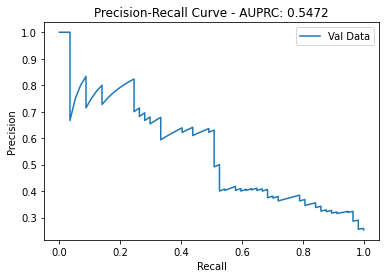

Val Result:

Accuracy Score: 78.67%
Precision Score: 73.68%
Recall Score: 24.56%
F1 score: 36.84%
Confusion Matrix:
[[163   5]
 [ 43  14]]
AUPRC: 0.5472
test Result:

Accuracy Score: 83.39%
Precision Score: 94.12%
Recall Score: 26.23%
F1 score: 41.03%
Confusion Matrix:
[[215   1]
 [ 45  16]]


D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8222222222222222


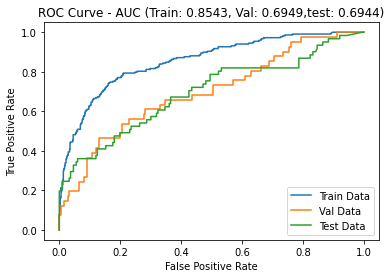

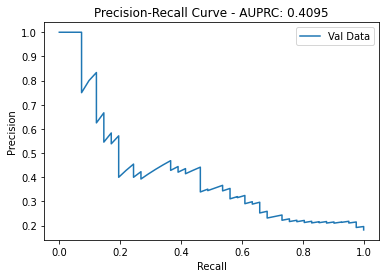

Val Result:

Accuracy Score: 82.22%
Precision Score: 53.33%
Recall Score: 19.51%
F1 score: 28.57%
Confusion Matrix:
[[177   7]
 [ 33   8]]
AUPRC: 0.4095
test Result:

Accuracy Score: 81.95%
Precision Score: 78.95%
Recall Score: 24.59%
F1 score: 37.50%
Confusion Matrix:
[[212   4]
 [ 46  15]]


D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8044444444444444


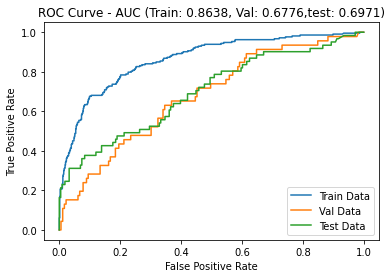

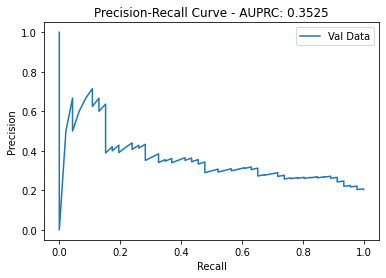

Val Result:

Accuracy Score: 80.44%
Precision Score: 58.33%
Recall Score: 15.22%
F1 score: 24.14%
Confusion Matrix:
[[174   5]
 [ 39   7]]
AUPRC: 0.3525
test Result:

Accuracy Score: 81.23%
Precision Score: 71.43%
Recall Score: 24.59%
F1 score: 36.59%
Confusion Matrix:
[[210   6]
 [ 46  15]]


D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.78125


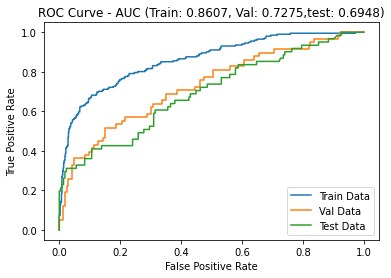

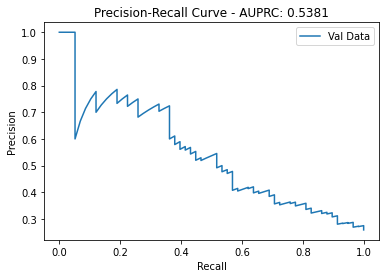

Val Result:

Accuracy Score: 78.12%
Precision Score: 69.57%
Recall Score: 27.59%
F1 score: 39.51%
Confusion Matrix:
[[159   7]
 [ 42  16]]
AUPRC: 0.5381
test Result:

Accuracy Score: 82.67%
Precision Score: 84.21%
Recall Score: 26.23%
F1 score: 40.00%
Confusion Matrix:
[[213   3]
 [ 45  16]]


D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8035714285714286


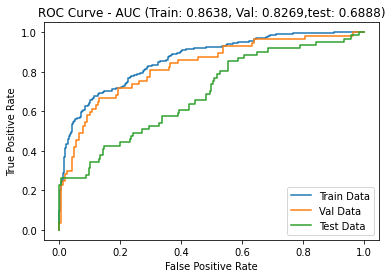

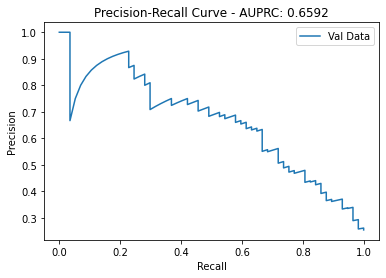

Val Result:

Accuracy Score: 80.36%
Precision Score: 84.21%
Recall Score: 28.07%
F1 score: 42.11%
Confusion Matrix:
[[164   3]
 [ 41  16]]
AUPRC: 0.6592
test Result:

Accuracy Score: 82.67%
Precision Score: 84.21%
Recall Score: 26.23%
F1 score: 40.00%
Confusion Matrix:
[[213   3]
 [ 45  16]]


In [12]:
from sklearn.model_selection import KFold

# 建立空列表，用於儲存各次交叉驗證的評估指標
xgb_accuracy_scores = []

xgb_auc_scores = []

kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建XGBoost分類器
    xgb_model = XGBClassifier(**best_params, random_state=42)
    eval_set = [(x_test, y_test_cv)]

    # 訓練模型
    xgb_model.fit(x_train, y_train,early_stopping_rounds=5, eval_set=eval_set, verbose=False)
        
    # 在測試集上進行預測
    y_pred = xgb_model.predict(x_test)
    
    # 計算模型的准确率或其他評估指标
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = xgb_model.predict_proba(x_train)
    xgb_fpr_train, xgb_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    xgb_auc_train = sklearn.metrics.auc(xgb_fpr_train, xgb_tpr_train)

    y_pred_proba_test = xgb_model.predict_proba(x_test)
    xgb_fpr_test, xgb_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    xgb_auc_test = sklearn.metrics.auc(xgb_fpr_test, xgb_tpr_test)

    # 在測試集上進行預測
    y_pred_last = xgb_model.predict(X_test)

    y_pred_proba_last_test = xgb_model.predict_proba(X_test)
    xgb_fpr_last_test, xgb_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    xgb_auc_last_test = sklearn.metrics.auc(xgb_fpr_last_test, xgb_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    xgb_precision_last, xgb_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    xgb_auprc_last = sklearn.metrics.auc(xgb_recall_last, xgb_precision_last) 

    # 計算模型的準確率或其他評估指標-------------
    xgb_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    
    # 將評估指標添加到列表中
    xgb_accuracy_scores.append(xgb_accuracy)

    # 將 AUC 添加到列表中
    xgb_auc_scores.append(xgb_auc_test)

    # 計算評估指標的平均值和標準差
    xgb_accuracy_mean = np.mean(xgb_accuracy_scores)
    xgb_accuracy_std = np.std(xgb_accuracy_scores)

    # 繪製ROC曲線
    plt.plot(xgb_fpr_train, xgb_tpr_train, label="Train Data")
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="Val Data")
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {xgb_auc_train:.4f}, Val: {xgb_auc_test:.4f},test: {xgb_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")


In [11]:
best_index = np.argmax(grid.best_score_)  # 获取最佳得分的索引
best_train_score = means_train[best_index]
best_val_score = means_val[best_index]

print("Best Model Train Score:", best_train_score)
print("Best Model Validation Score:", best_val_score)

Best Model Train Score: 0.8880738183197385
Best Model Validation Score: 0.7656530606803611


GBM_SMOTE

In [12]:
len(X_test)
len(y_test)

277

最佳AUC: 0.7429254695353278，最佳參數組合：{'learning_rate': 0.042, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 58, 'subsample': 0.32}
訓練集平均AUC: 0.871599891780046, 標準差: 0.007401608493755042, 驗證集平均AUC: 0.7429254695353278, 標準差: 0.032059468364619, 參數組合: {'learning_rate': 0.042, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 58, 'subsample': 0.32}
Test Result:

Accuracy Score: 82.67%
Precision Score: 93.33%
Recall Score: 22.95%
F1 score: 36.84%
Confusion Matrix:
 [[215   1]
 [ 47  14]]


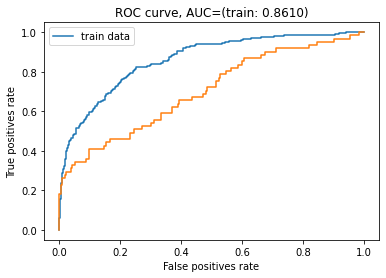

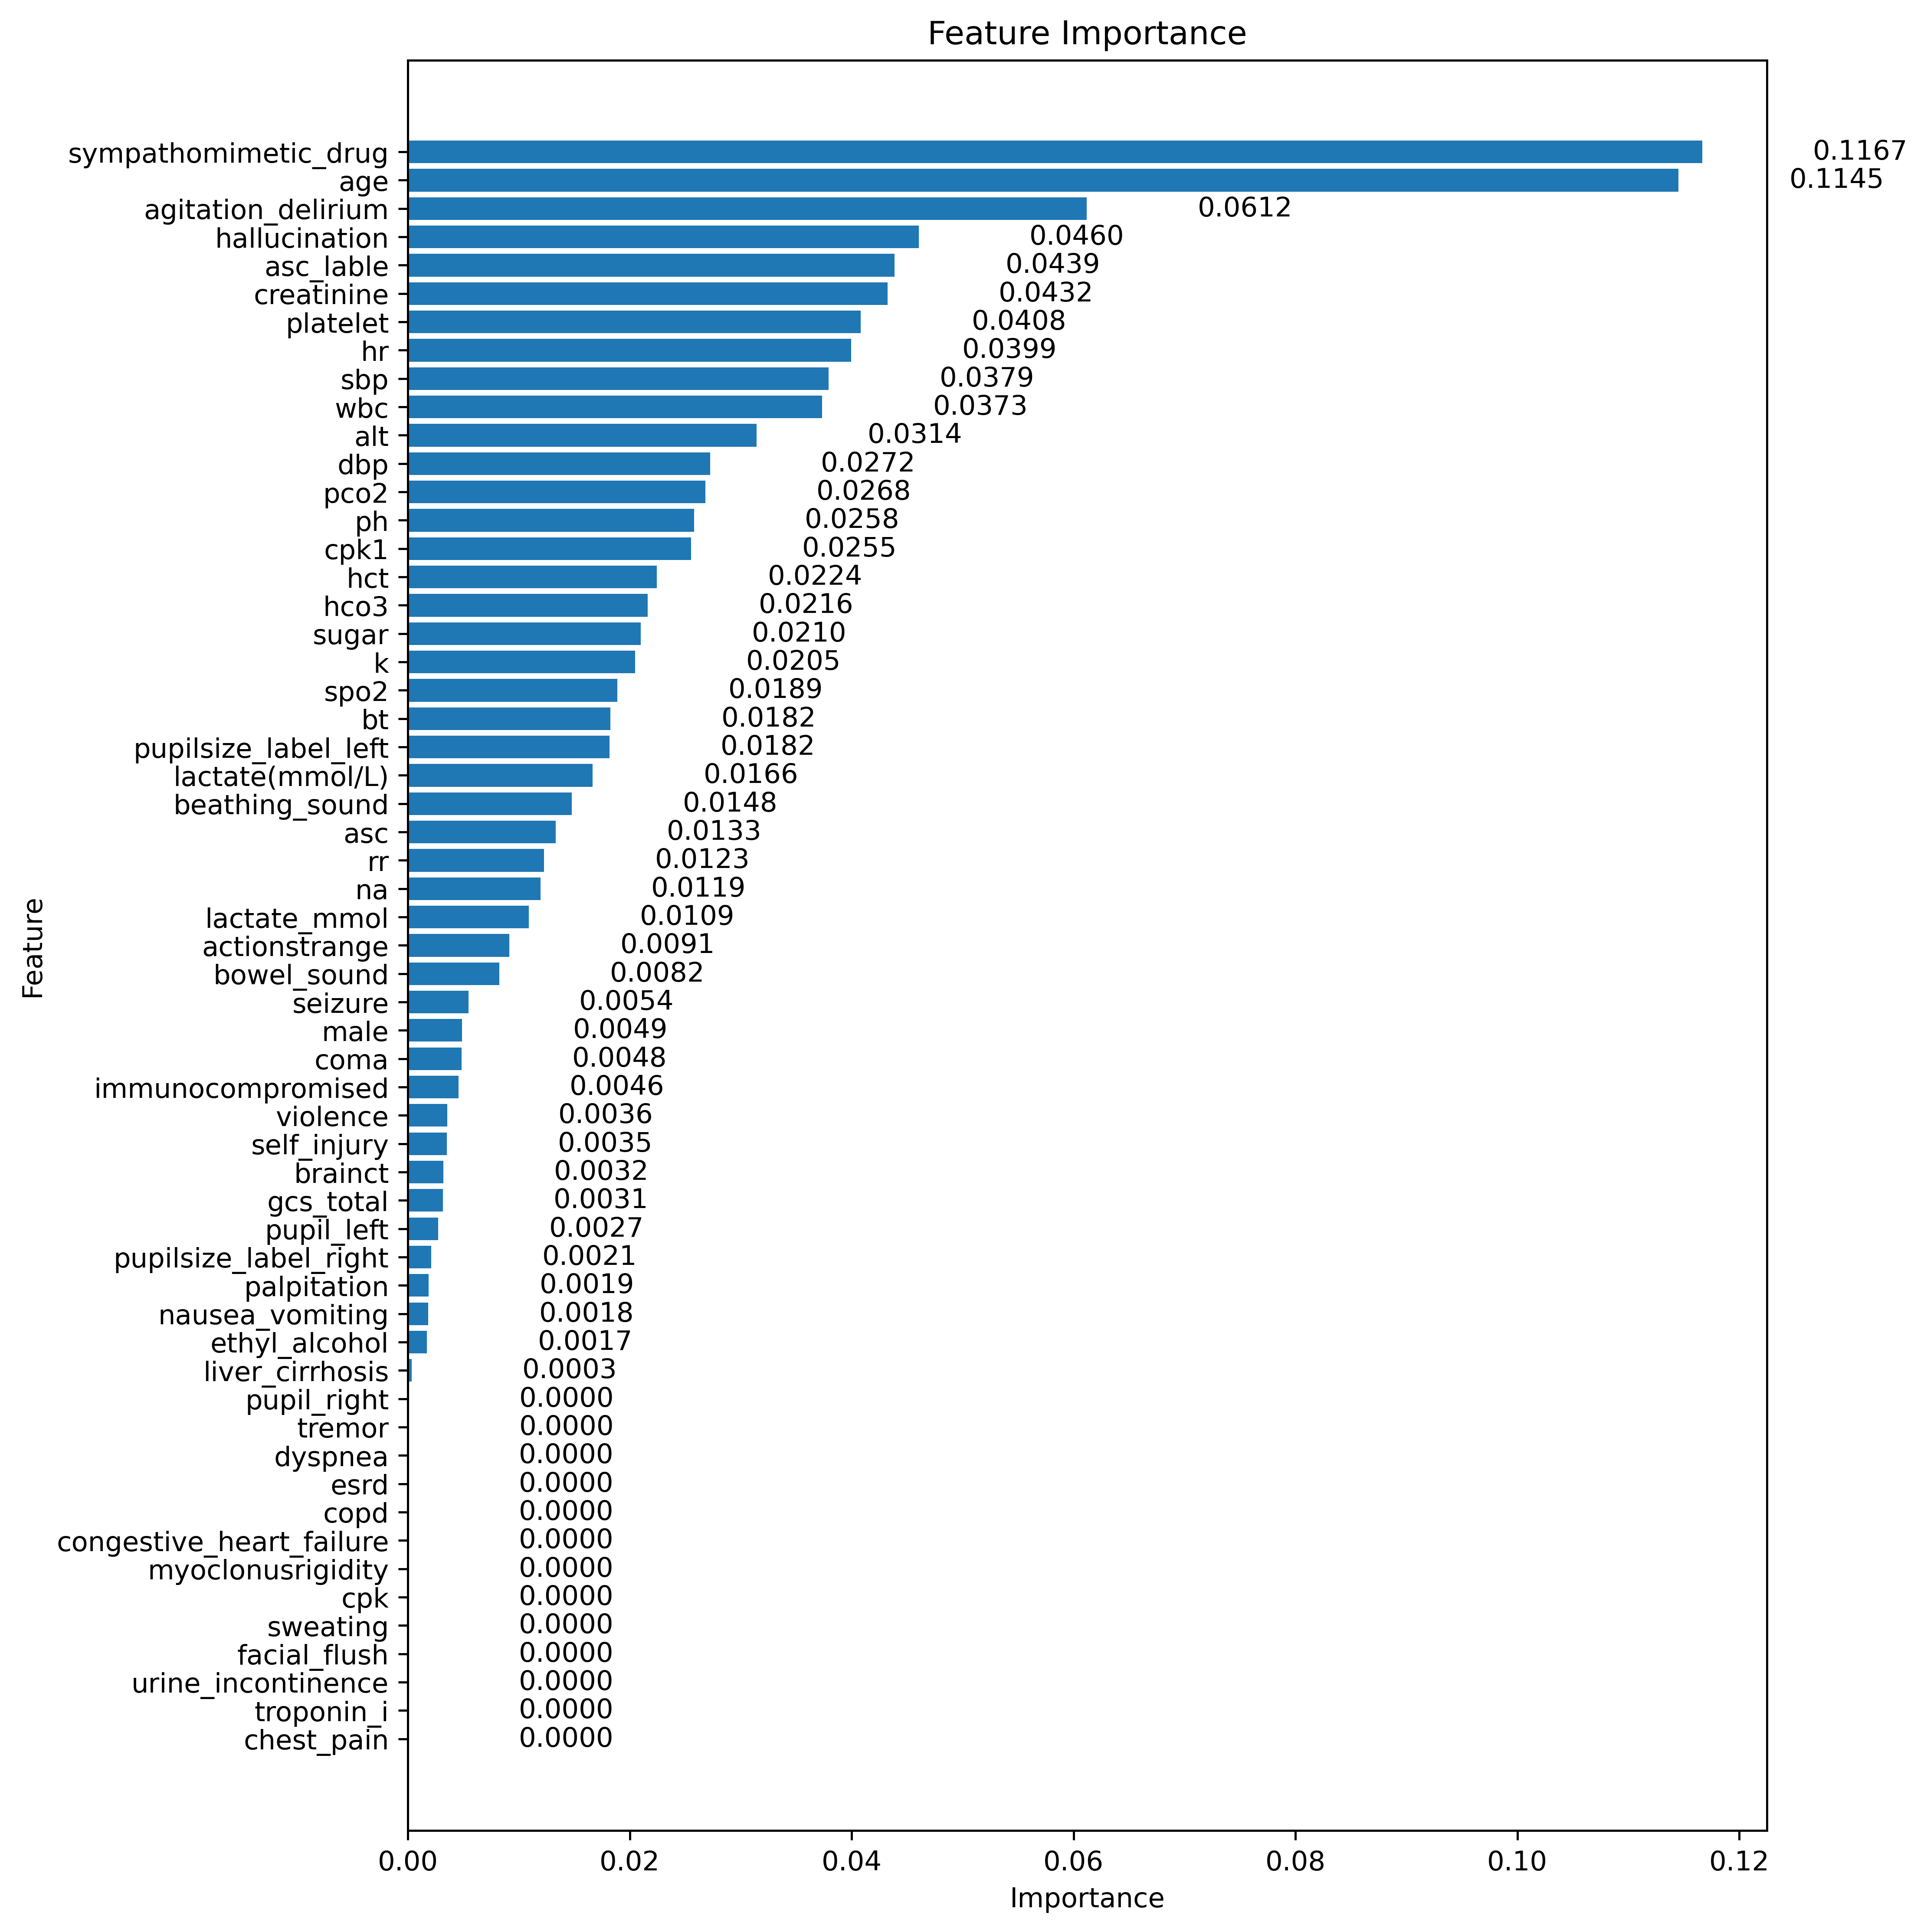

(1123, 57)


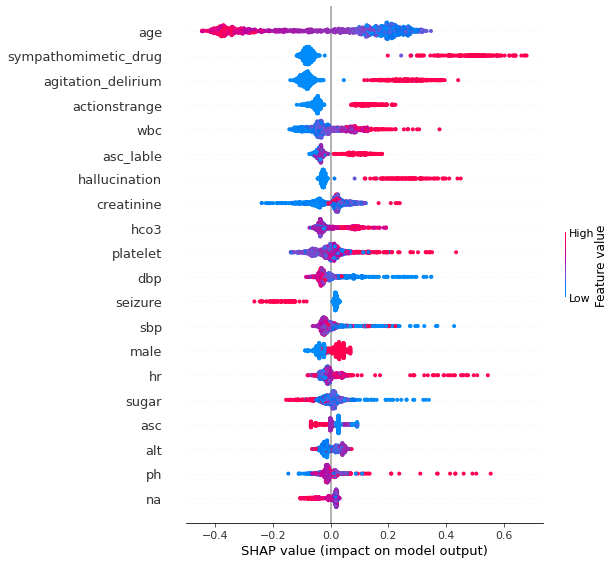

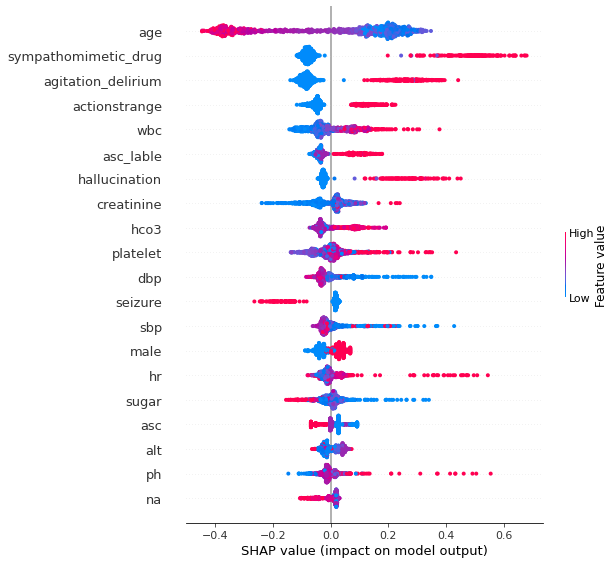

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


# 定義參數空間
param_grid = {
    'n_estimators': [ 58],
    'learning_rate': [0.042],
    'max_depth': [3],
    'subsample': [0.32],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}
# 最佳AUC: 0.7382720992478392，最佳參數組合：{'learning_rate': 0.044, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.3}
# 創建GBM模型
gbm = GradientBoostingClassifier()


# 定義Grid Search對象
grid_search = GridSearchCV(gbm, param_grid, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)


gbm_best_params = grid_search.best_params_



# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")
# 取得 cross validation 的平均準確率及標準差

means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


# GBM
gbm = GradientBoostingClassifier(**gbm_best_params)
gbm.fit(X_train_smote, y_train_smote)

import matplotlib.pyplot as plt

y_pred_proba_train = gbm.predict_proba(X_train_smote)

fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])

# auc_val = sklearn.metrics.auc(fpr_val, tpr_val)
auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


plt.title(f"ROC curve, AUC=(train: {auc_train:.4f})")
# plt.plot(fpr_val, tpr_val, label="val data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.xlabel('False positives rate')
plt.ylabel('True positives rate')
plt.legend()

# # 將測試資料轉換成模型所需的格式
# X_test = dataset_test.iloc[:, 1:].values

# # 將測試資料轉換成模型所需的格式
# Y_test = dataset_test.iloc[:, 0].values

y_pred_proba_test = gbm.predict_proba(X_test)

# 使用模型進行預測
y_pred = gbm.predict(X_test)

predictions = [round(value) for value in y_pred]


# accuracy = accuracy_score(y_test, predictions)

# # print("Accuracy: %.2f%%" % (accuracy * 100.0))


print('Test Result:\n')
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, y_pred)*100:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])
plt.plot(fpr_test_final, tpr_test_final, label="test data")
# # plt.plot(fpr_val, tpr_val, label="val data")
# plt.plot(fpr_train, tpr_train, label="train data")
# plt.xlabel('False positives rate')
# plt.ylabel('True positives rate')
auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)
# plt.legend()

# # plt.title(f"ROC curve, AUC=(test: {auc_test_final:.4f}, val: {auc_val:.4f}, train: {auc_train:.4f})")
# plt.title(f"ROC curve, AUC=( train: {auc_train:.4f})")
gbm_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用

# 轉換X為DataFrame物件
l = pd.DataFrame(X, columns=dataset.columns[1:])

# 取得特徵重要性
importance = gbm.feature_importances_

# 設定圖表大小
plt.figure(figsize=(10, 10),dpi=450)

# 繪製特徵重要性長條圖
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# 反轉Y軸，讓重要性高的項目顯示在上方
plt.gca().invert_yaxis()

# 顯示特徵重要性數值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

# 調整Y軸刻度標籤
plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()



# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': l.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)


# print('Test Result:\n')
# print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
# print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")
# print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")
# print(f"F1 score: {f1_score(y_test, y_pred)*100:.2f}%")
# print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")



import shap

# 建立SHAP TreeExplainer
explainer = shap.TreeExplainer(gbm)

# 將 X_train 轉換為 DataFrame 並指定特徵名稱
X_train_df = pd.DataFrame(X_train_smote, columns=l.columns)

# 計算SHAP值
shap_values = explainer.shap_values(X_train_df)

# 印出SHAP值的形狀
print(shap_values.shape)

# 繪製SHAP摘要圖
shap.summary_plot(shap_values, X_train_df)

# 繪製SHAP條形圖
# shap.summary_plot(shap_values, X_train_df, plot_type="bar")

# 繪製單個實例的SHAP力圖
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :])

# 儲存SHAP摘要圖
shap.summary_plot(shap_values, X_train_df, show=False)
plt.savefig('Exclude Urinalysis gbm_shap.png', dpi=450)

Accuracy: 0.7644444444444445
AUC Result:

LDA AUC: 0.7082 +/- 0.0000 (95% Confidence Interval: 0.7082 - 0.7082)
LDA Accuracy Score: 76.44% +/- 0.00% (95% Confidence Interval: nan% - nan%)


invalid value encountered in multiply
invalid value encountered in multiply


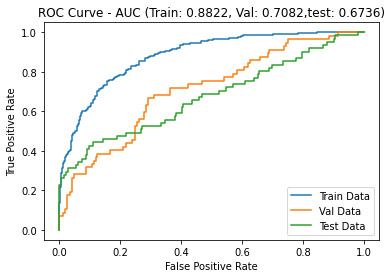

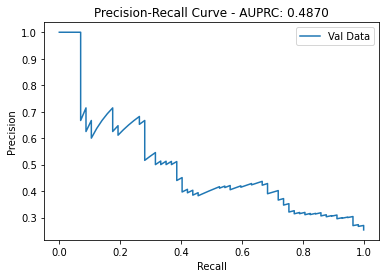

Val Result:

Accuracy Score: 76.44%
Precision Score: 66.67%
Recall Score: 14.04%
F1 score: 23.19%
Confusion Matrix:
[[164   4]
 [ 49   8]]
AUPRC: 0.4870
test Result:

Accuracy Score: 83.03%
Precision Score: 93.75%
Recall Score: 24.59%
F1 score: 38.96%
Confusion Matrix:
[[215   1]
 [ 46  15]]
Accuracy: 0.8311111111111111
AUC Result:

LDA AUC: 0.7267 +/- 0.0181 (95% Confidence Interval: 0.6912 - 0.7622)
LDA Accuracy Score: 79.78% +/- 3.33% (95% Confidence Interval: 37.42% - 122.13%)


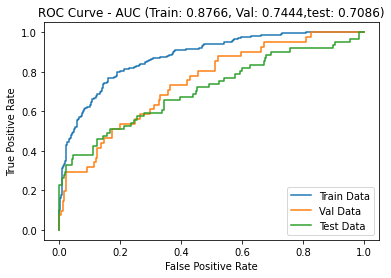

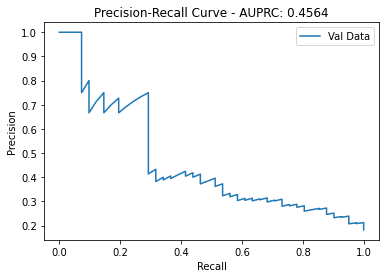

Val Result:

Accuracy Score: 83.11%
Precision Score: 66.67%
Recall Score: 14.63%
F1 score: 24.00%
Confusion Matrix:
[[181   3]
 [ 35   6]]
AUPRC: 0.4564
test Result:

Accuracy Score: 83.03%
Precision Score: 100.00%
Recall Score: 22.95%
F1 score: 37.33%
Confusion Matrix:
[[216   0]
 [ 47  14]]
Accuracy: 0.8
AUC Result:

LDA AUC: 0.6961 +/- 0.0455 (95% Confidence Interval: 0.6067 - 0.7855)
LDA Accuracy Score: 79.85% +/- 2.72% (95% Confidence Interval: 68.13% - 91.57%)


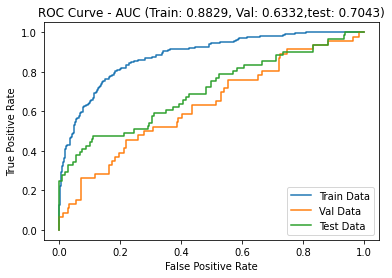

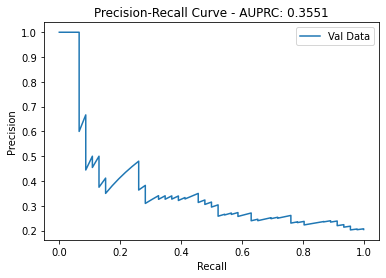

Val Result:

Accuracy Score: 80.00%
Precision Score: 57.14%
Recall Score: 8.70%
F1 score: 15.09%
Confusion Matrix:
[[176   3]
 [ 42   4]]
AUPRC: 0.3551
test Result:

Accuracy Score: 83.03%
Precision Score: 88.89%
Recall Score: 26.23%
F1 score: 40.51%
Confusion Matrix:
[[214   2]
 [ 45  16]]
Accuracy: 0.7767857142857143
AUC Result:

LDA AUC: 0.7072 +/- 0.0428 (95% Confidence Interval: 0.6231 - 0.7912)
LDA Accuracy Score: 79.31% +/- 2.54% (95% Confidence Interval: 71.23% - 87.39%)


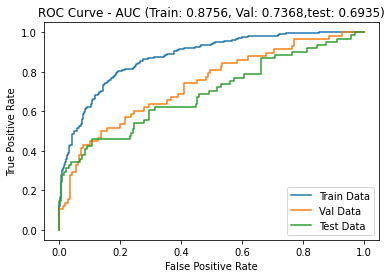

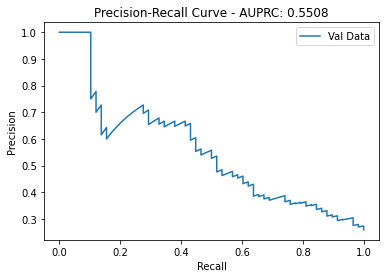

Val Result:

Accuracy Score: 77.68%
Precision Score: 70.00%
Recall Score: 24.14%
F1 score: 35.90%
Confusion Matrix:
[[160   6]
 [ 44  14]]
AUPRC: 0.5508
test Result:

Accuracy Score: 82.67%
Precision Score: 93.33%
Recall Score: 22.95%
F1 score: 36.84%
Confusion Matrix:
[[215   1]
 [ 47  14]]
Accuracy: 0.7767857142857143
AUC Result:

LDA AUC: 0.7302 +/- 0.0609 (95% Confidence Interval: 0.6108 - 0.8497)
LDA Accuracy Score: 78.98% +/- 2.36% (95% Confidence Interval: 72.42% - 85.54%)


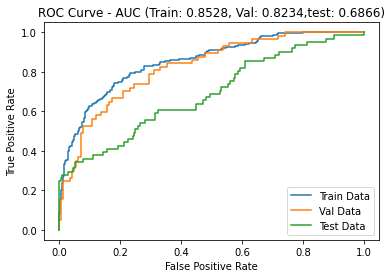

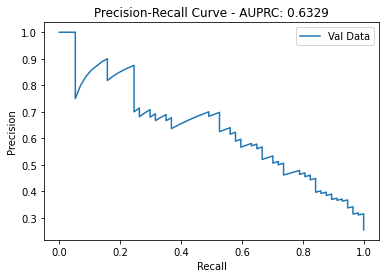

Val Result:

Accuracy Score: 77.68%
Precision Score: 81.82%
Recall Score: 15.79%
F1 score: 26.47%
Confusion Matrix:
[[165   2]
 [ 48   9]]
AUPRC: 0.6329
test Result:

Accuracy Score: 83.03%
Precision Score: 93.75%
Recall Score: 24.59%
F1 score: 38.96%
Confusion Matrix:
[[215   1]
 [ 46  15]]


In [60]:
from sklearn.model_selection import KFold

# 建立空列表，用於儲存各次交叉驗證的評估指標
gbm_accuracy_scores = []
# LDA_precision_scores = []
# LDA_recall_scores = []
# LDA_f1_scores = []
gbm_auc_scores = []

kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建XGBoost分類器
    gbm_model = GradientBoostingClassifier(**gbm_best_params, random_state=70)
    
    # 訓練模型
    gbm_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = gbm_model.predict(x_test)
    
    # 計算模型的准确率或其他評估指标
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = gbm_model.predict_proba(x_train)
    gbm_fpr_train, gbm_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    gbm_auc_train = sklearn.metrics.auc(gbm_fpr_train, gbm_tpr_train)

    y_pred_proba_test = gbm_model.predict_proba(x_test)
    gbm_fpr_test, gbm_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    gbm_auc_test = sklearn.metrics.auc(gbm_fpr_test, gbm_tpr_test)

    # 在測試集上進行預測
    y_pred_last = gbm_model.predict(X_test)

    y_pred_proba_last_test = gbm_model.predict_proba(X_test)
    gbm_fpr_last_test, gbm_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    gbm_auc_last_test = sklearn.metrics.auc(gbm_fpr_last_test, gbm_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    gbm_precision_last, gbm_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    gbm_auprc_last = sklearn.metrics.auc(gbm_recall_last, gbm_precision_last) 

    # 計算模型的準確率或其他評估指標-------------
    gbm_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # LDA_precision = sklearn.metrics.precision_score(y_test_cv, y_pred)
    # LDA_recall = sklearn.metrics.recall_score(y_test_cv, y_pred)
    # LDA_f1 = sklearn.metrics.f1_score(y_test_cv, y_pred)

    # 將評估指標添加到列表中
    gbm_accuracy_scores.append(gbm_accuracy)
    # LDA_precision_scores.append(LDA_precision)
    # LDA_recall_scores.append(LDA_recall)
    # LDA_f1_scores.append(LDA_f1)
    #--------------------------------------------
    # 將 AUC 添加到列表中
    gbm_auc_scores.append(gbm_auc_test)

    # 計算評估指標的平均值和標準差
    gbm_accuracy_mean = np.mean(gbm_accuracy_scores)
    gbm_accuracy_std = np.std(gbm_accuracy_scores)
    # LDA_precision_mean = np.mean(LDA_precision_scores)
    # LDA_precision_std = np.std(LDA_precision_scores)
    # LDA_recall_mean = np.mean(LDA_recall_scores)
    # LDA_recall_std = np.std(LDA_recall_scores)
    # LDA_f1_mean = np.mean(LDA_f1_scores)
    # LDA_f1_std = np.std(LDA_f1_scores)

    # 使用 bootstrap 方法計算 AUC 的信賴區間
    bootstrap_auc = resample(gbm_auc_scores, replace=True, n_samples=1000, random_state=42)
    auc_mean = np.mean(bootstrap_auc)
    auc_std = np.std(bootstrap_auc)
    confidence = 0.95
    auc_interval = stats.t.interval(confidence, len(bootstrap_auc) - 1, loc=auc_mean, scale=auc_std)
    gbm_accuracy_interval = stats.t.interval(confidence, len(gbm_accuracy_scores) - 1, loc=gbm_accuracy_mean, scale=gbm_accuracy_std)
    # LDA_precision_interval = stats.t.interval(confidence, len(LDA_precision_scores) - 1, loc=LDA_precision_mean, scale=LDA_precision_std)
    # LDA_recall_interval = stats.t.interval(confidence, len(LDA_recall_scores) - 1, loc=LDA_recall_mean, scale=LDA_recall_std)
    # LDA_f1_interval = stats.t.interval(confidence, len(LDA_f1_scores) - 1, loc=LDA_f1_mean, scale=LDA_f1_std)

    # 打印結果
    print("AUC Result:\n")
    print(f"gbm AUC: {auc_mean:.4f} +/- {auc_std:.4f} (95% Confidence Interval: {auc_interval[0]:.4f} - {auc_interval[1]:.4f})")
    print(f"gbm Accuracy Score: {gbm_accuracy_mean*100:.2f}% +/- {gbm_accuracy_std*100:.2f}% (95% Confidence Interval: {gbm_accuracy_interval[0]*100:.2f}% - {gbm_accuracy_interval[1]*100:.2f}%)")

    # 繪製ROC曲線
    plt.plot(gbm_fpr_train, gbm_tpr_train, label="Train Data")
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="Val Data")
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {gbm_auc_train:.4f}, Val: {gbm_auc_test:.4f},test: {gbm_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

In [112]:
gbm_best_params

{'learning_rate': 0.03,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'subsample': 0.6}

In [25]:
best_index = np.argmax(grid_search.best_score_)  # 获取最佳得分的索引
best_train_score = means_train[best_index]
best_val_score = means_val[best_index]

print("Best Model Train Score:", best_train_score)
print("Best Model Validation Score:", best_val_score)

Best Model Train Score: 0.9505897215467977
Best Model Validation Score: 0.7630570520575898


LDA_SMOTE

Fitting 5 folds for each of 6 candidates, totalling 30 fits
最佳AUC: 0.7568971678551161，最佳參數組合：{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
訓練集平均AUC: 0.8148046606487839, 標準差: 0.008263133508414669, 驗證集平均AUC: 0.7568971678551161, 標準差: 0.04109992635364117, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
訓練集平均AUC: 0.8148046606487839, 標準差: 0.008263133508414669, 驗證集平均AUC: 0.7568971678551161, 標準差: 0.04109992635364117, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 1e-05}
訓練集平均AUC: 0.8148046606487839, 標準差: 0.008263133508414669, 驗證集平均AUC: 0.7568971678551161, 標準差: 0.04109992635364117, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 1e-06}
訓練集平均AUC: 0.8148046606487839, 標準差: 0.008263133508414669, 驗證集平均AUC: 0.7568971678551161, 標

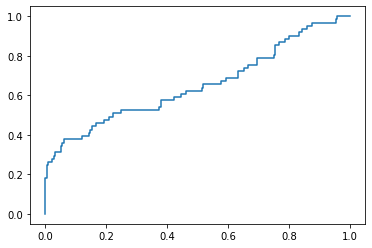

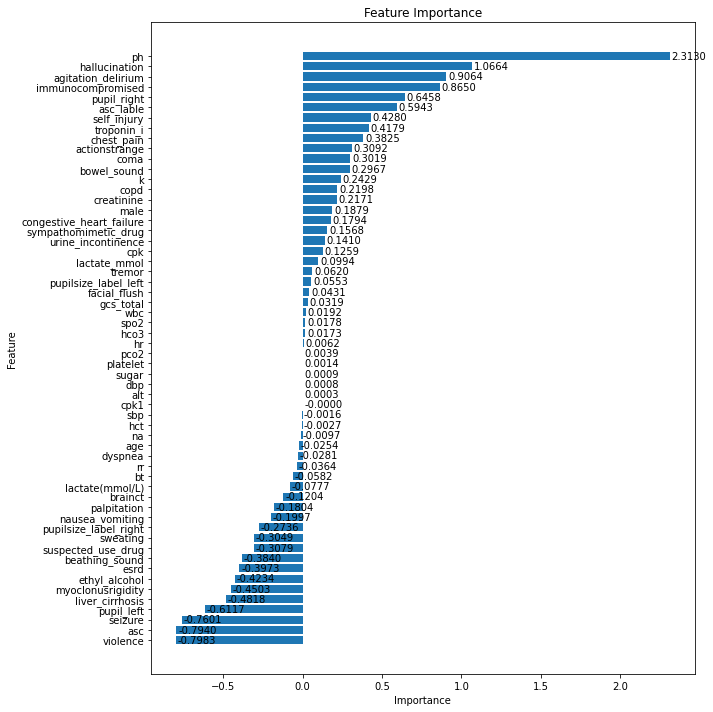

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
# 定義參數空間
param_grid = {
    'solver': ['svd', 'lsqr'],
    'shrinkage': [None],
    'priors': [ None],
    'n_components' : [None], 
    'store_covariance' : [True], 
    'tol' : [1e-4,1e-5,1e-6]
}

# 創建LDA模型
lda = LinearDiscriminantAnalysis()

# 定義Grid Search對象
grid_search_lda = GridSearchCV(lda, param_grid, cv=5,verbose=True,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

grid_search_lda.fit(X_train_smote, y_train_smote)

# 評估，打分數
print(f"最佳AUC: {grid_search_lda.best_score_}，最佳參數組合：{grid_search_lda.best_params_}")
# 取得 cross validation 的平均準確率及標準差

means_train = grid_search_lda.cv_results_['mean_train_score']
stds_train = grid_search_lda.cv_results_['std_train_score']
means_val = grid_search_lda.cv_results_['mean_test_score']
stds_val = grid_search_lda.cv_results_['std_test_score']
params = grid_search_lda.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")
    
lda_best_params = grid_search_lda.best_params_

# 使用最佳參數組合的模型進行預測
lda = LinearDiscriminantAnalysis(**lda_best_params)
lda.fit(X_train_smote, y_train_smote)
# lda_predictions = lda.predict(X_val)
# lda_accuracy = accuracy_score(y_val, lda_predictions)

# # 使用模型進行預測
y_pred = lda.predict(X_test)
# y_pred_proba = lda.predict_proba(X_test)[:, 1]

# predictions = [round(value) for value in y_pred]

# accuracy = accuracy_score(y_test, predictions)

# print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print('Test Result:\n')
# print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
# print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")
# print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")
# print(f"F1 score: {f1_score(y_test, y_pred)*100:.2f}%")
# print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")


# y_pred_proba_train = lda.predict_proba(X_train_smote)
# # y_pred_proba_val = lda.predict_proba(X_val)
# # fpr_val, tpr_val, _ = sklearn.metrics.roc_curve(y_val, y_pred_proba_val[:, 1])
# fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])
y_pred_proba_test = lda.predict_proba(X_test)
# # auc_val = sklearn.metrics.auc(fpr_val, tpr_val)
# auc_train = sklearn.metrics.auc(fpr_train, tpr_train)

fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])
plt.plot(fpr_test_final, tpr_test_final, label="test data")
# # plt.plot(fpr_val, tpr_val, label="val data")
# plt.plot(fpr_train, tpr_train, label="train data")
# plt.xlabel('False positives rate')
# plt.ylabel('True positives rate')
auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)
# plt.legend()

# # plt.title(f"ROC curve, AUC=(test: {auc_test_final:.4f}, val: {auc_val:.4f}, train: {auc_train:.4f})")
# plt.title(f"ROC curve, AUC=( train: {auc_train:.4f})")
lda_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用

# 取得特徵重要性
importance = lda.coef_[0]

# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': dataset.columns[1:], 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 10))

# 繪製特徵重要性
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.gca().invert_yaxis()

# 顯示特徵重要性值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()



# import shap

# # 建立SHAP TreeExplainer
# explainer = shap.KernelExplainer(lda.predict_proba, X_train_smote)

# # 將 X_train 轉換為 DataFrame 並指定特徵名稱
# X_train_df = pd.DataFrame(X_train_smote, columns=l.columns)

# # 計算 SHAP 值
# # shap_values = explainer(X_train_df)

# # # 繪製 SHAP 摘要圖
# # shap.summary_plot(shap_values, X_test, plot_type="bar")

# # 計算SHAP值
# # shap_values = explainer.shap_values(X_train_df)

# # 印出SHAP值的形狀
# print(shap_values.shape)

# # 繪製SHAP摘要圖
# # shap.summary_plot(shap_values, X_train_df)
# shap.summary_plot(shap_values, X_train_df, plot_type="bar")
# # 繪製SHAP條形圖
# # shap.summary_plot(shap_values, X_train_df, plot_type="bar")

# # 繪製單個實例的SHAP力圖
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :])

# # 儲存SHAP摘要圖
# shap.summary_plot(shap_values, X_train_df, show=False)
# plt.savefig('lda_shap.png', dpi=450)

AUC Result:

LDA AUC: 0.7272 +/- 0.0000 (95% Confidence Interval: 0.7272 - 0.7272)
LDA Accuracy Score: 77.33% +/- 0.00% (95% Confidence Interval: nan% - nan%)


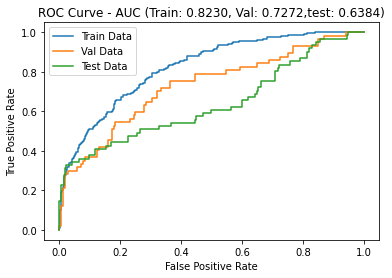

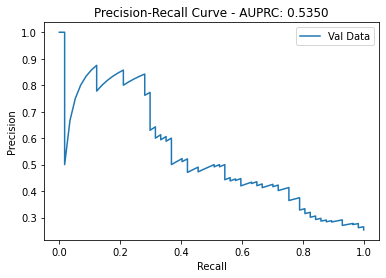

Val Result:

Accuracy Score: 77.33%
Precision Score: 59.38%
Recall Score: 33.33%
F1 score: 42.70%
Confusion Matrix:
[[155  13]
 [ 38  19]]
AUPRC: 0.5350
test Result:

Accuracy Score: 81.59%
Precision Score: 65.62%
Recall Score: 34.43%
F1 score: 45.16%
Confusion Matrix:
[[205  11]
 [ 40  21]]
AUC Result:

LDA AUC: 0.7547 +/- 0.0269 (95% Confidence Interval: 0.7019 - 0.8074)
LDA Accuracy Score: 79.33% +/- 2.00% (95% Confidence Interval: nan% - nan%)


invalid value encountered in multiply
invalid value encountered in multiply


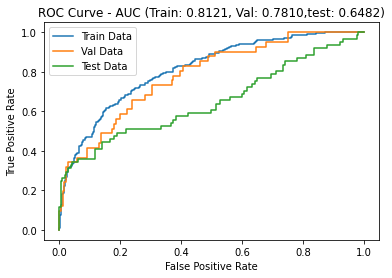

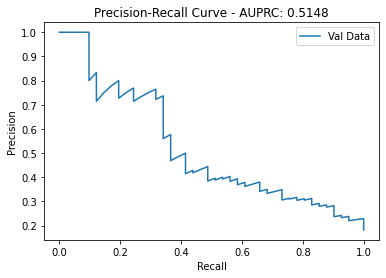

Val Result:

Accuracy Score: 81.33%
Precision Score: 48.39%
Recall Score: 36.59%
F1 score: 41.67%
Confusion Matrix:
[[168  16]
 [ 26  15]]
AUPRC: 0.5148
test Result:

Accuracy Score: 80.87%
Precision Score: 61.11%
Recall Score: 36.07%
F1 score: 45.36%
Confusion Matrix:
[[202  14]
 [ 39  22]]
AUC Result:

LDA AUC: 0.7330 +/- 0.0367 (95% Confidence Interval: 0.6610 - 0.8050)
LDA Accuracy Score: 78.81% +/- 1.79% (95% Confidence Interval: 70.73% - 87.94%)


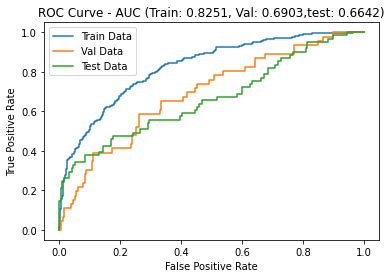

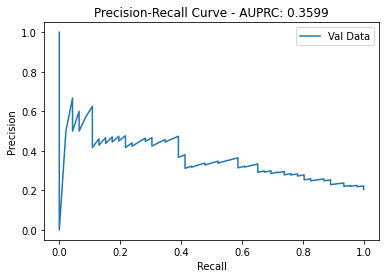

Val Result:

Accuracy Score: 77.78%
Precision Score: 41.67%
Recall Score: 21.74%
F1 score: 28.57%
Confusion Matrix:
[[165  14]
 [ 36  10]]
AUPRC: 0.3599
test Result:

Accuracy Score: 80.51%
Precision Score: 60.00%
Recall Score: 34.43%
F1 score: 43.75%
Confusion Matrix:
[[202  14]
 [ 40  21]]
AUC Result:

LDA AUC: 0.7420 +/- 0.0346 (95% Confidence Interval: 0.6742 - 0.8099)
LDA Accuracy Score: 78.64% +/- 1.58% (95% Confidence Interval: 73.12% - 84.51%)


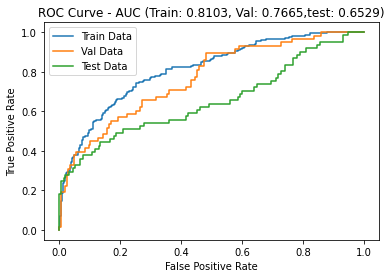

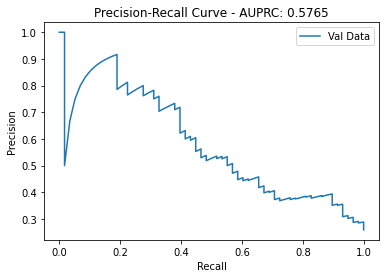

Val Result:

Accuracy Score: 78.12%
Precision Score: 62.16%
Recall Score: 39.66%
F1 score: 48.42%
Confusion Matrix:
[[152  14]
 [ 35  23]]
AUPRC: 0.5765
test Result:

Accuracy Score: 80.87%
Precision Score: 62.50%
Recall Score: 32.79%
F1 score: 43.01%
Confusion Matrix:
[[204  12]
 [ 41  20]]
AUC Result:

LDA AUC: 0.7568 +/- 0.0435 (95% Confidence Interval: 0.6715 - 0.8421)
LDA Accuracy Score: 78.72% +/- 1.42% (95% Confidence Interval: 74.26% - 83.03%)


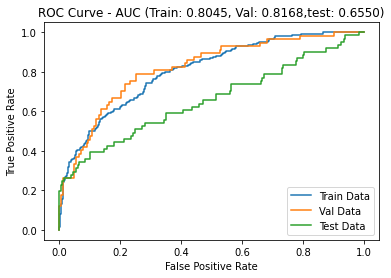

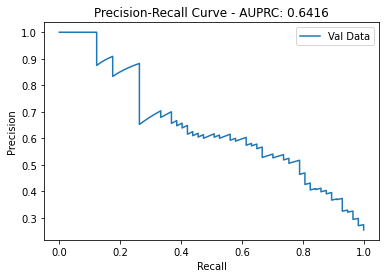

Val Result:

Accuracy Score: 79.02%
Precision Score: 64.71%
Recall Score: 38.60%
F1 score: 48.35%
Confusion Matrix:
[[155  12]
 [ 35  22]]
AUPRC: 0.6416
test Result:

Accuracy Score: 80.51%
Precision Score: 60.00%
Recall Score: 34.43%
F1 score: 43.75%
Confusion Matrix:
[[202  14]
 [ 40  21]]


In [56]:
import numpy as np
import scipy.stats as stats
from sklearn.utils import resample

# 建立空列表，用於儲存各次交叉驗證的評估指標
LDA_accuracy_scores = []
# LDA_precision_scores = []
# LDA_recall_scores = []
# LDA_f1_scores = []
LDA_auc_scores = []

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建LDA
    lda_model = LinearDiscriminantAnalysis(**lda_best_params)
    
    # 訓練模型
    lda_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = lda_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = lda_model.predict_proba(x_train)
    lda_fpr_train, lda_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    lda_auc_train = sklearn.metrics.auc(lda_fpr_train, lda_tpr_train)

    y_pred_proba_test = lda_model.predict_proba(x_test)
    lda_fpr_test, lda_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    lda_auc_test = sklearn.metrics.auc(lda_fpr_test, lda_tpr_test)

    # 在測試集上進行預測
    y_pred_last = lda_model.predict(X_test)

    y_pred_proba_last_test = lda_model.predict_proba(X_test)
    lda_fpr_last_test, lda_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    lda_auc_last_test = sklearn.metrics.auc(lda_fpr_last_test, lda_tpr_last_test)
  

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

     # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    lda_precision_last, lda_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    lda_auprc_last = sklearn.metrics.auc(lda_recall_last, lda_precision_last) 

    # 計算模型的準確率或其他評估指標-------------
    LDA_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # LDA_precision = sklearn.metrics.precision_score(y_test_cv, y_pred)
    # LDA_recall = sklearn.metrics.recall_score(y_test_cv, y_pred)
    # LDA_f1 = sklearn.metrics.f1_score(y_test_cv, y_pred)

    # 將評估指標添加到列表中
    LDA_accuracy_scores.append(LDA_accuracy)
    # LDA_precision_scores.append(LDA_precision)
    # LDA_recall_scores.append(LDA_recall)
    # LDA_f1_scores.append(LDA_f1)
    #--------------------------------------------
    # 將 AUC 添加到列表中
    LDA_auc_scores.append(lda_auc_test)

    # 使用 bootstrap 方法計算 AUC 的信賴區間
    bootstrap_auc = resample(LDA_auc_scores, replace=True, n_samples=1000, random_state=42)
    auc_mean = np.mean(bootstrap_auc)
    auc_std = np.std(bootstrap_auc)
    confidence = 0.95
    auc_interval = stats.t.interval(confidence, len(bootstrap_auc) - 1, loc=auc_mean, scale=auc_std)
    LDA_accuracy_interval = stats.t.interval(confidence, len(LDA_accuracy_scores) - 1, loc=LDA_accuracy_mean, scale=LDA_accuracy_std)
    # LDA_precision_interval = stats.t.interval(confidence, len(LDA_precision_scores) - 1, loc=LDA_precision_mean, scale=LDA_precision_std)
    # LDA_recall_interval = stats.t.interval(confidence, len(LDA_recall_scores) - 1, loc=LDA_recall_mean, scale=LDA_recall_std)
    # LDA_f1_interval = stats.t.interval(confidence, len(LDA_f1_scores) - 1, loc=LDA_f1_mean, scale=LDA_f1_std)
    # 計算評估指標的平均值和標準差
    LDA_accuracy_mean = np.mean(LDA_accuracy_scores)
    LDA_accuracy_std = np.std(LDA_accuracy_scores)
    # LDA_precision_mean = np.mean(LDA_precision_scores)
    # LDA_precision_std = np.std(LDA_precision_scores)
    # LDA_recall_mean = np.mean(LDA_recall_scores)
    # LDA_recall_std = np.std(LDA_recall_scores)
    # LDA_f1_mean = np.mean(LDA_f1_scores)
    # LDA_f1_std = np.std(LDA_f1_scores)

    # 打印結果
    print("AUC Result:\n")
    print(f"LDA AUC: {auc_mean:.4f} +/- {auc_std:.4f} (95% Confidence Interval: {auc_interval[0]:.4f} - {auc_interval[1]:.4f})")
    print(f"LDA Accuracy Score: {LDA_accuracy_mean*100:.2f}% +/- {LDA_accuracy_std*100:.2f}% (95% Confidence Interval: {LDA_accuracy_interval[0]*100:.2f}% - {LDA_accuracy_interval[1]*100:.2f}%)")

    # 繪製ROC曲線
    plt.plot(lda_fpr_train, lda_tpr_train, label="Train Data")
    plt.plot(lda_fpr_test, lda_tpr_test, label="Val Data")
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {lda_auc_train:.4f}, Val: {lda_auc_test:.4f},test: {lda_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")


MLR


90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l

最佳AUC: 0.7552616230915418，最佳參數組合：{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
訓練集平均AUC: 0.5137655226085476, 標準差: 0.03693227879581066, 驗證集平均AUC: 0.5071613527580885, 標準差: 0.052515252534542714, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
訓練集平均AUC: nan, 標準差: nan, 驗證集平均AUC: nan, 標準差: nan, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
訓練集平均AUC: nan, 標準差: nan, 驗證集平均AUC: nan, 標準差: nan, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
訓練集平均AUC: 0.5140121926090429, 標準差: 0.037104885506470585, 驗證集平均AUC: 0.5072077380695316, 標準差: 0.05268889496578291, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
訓練集平均AUC: 0.7228199824810959, 標準差: 0.01719981726592084, 驗證集平均AUC: 0.6775143692581006, 標準差: 0.03376043265512498, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
訓練集平均AUC: 0.8115106141339152, 標準差: 0.008644731631172738, 驗證集平均AUC: 0.7552616230915418, 標準差: 0.035008548822902

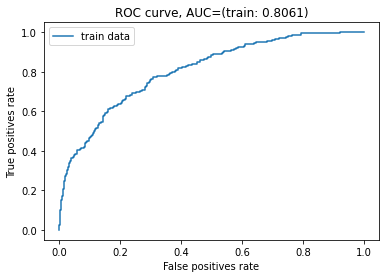

In [43]:
from sklearn.linear_model import LogisticRegression

# 定義參數空間
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 500]
}

mlr = LogisticRegression(multi_class='multinomial')


# 定義Grid Search對象
grid_search = GridSearchCV(mlr, param_grid, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)

# 輸出最佳參數組合
# print("Best Parameters: ", grid_search.best_params_)

mlr_best_params = grid_search.best_params_



# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")
# 取得 cross validation 的平均準確率及標準差

means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


# MLR
mlr = LogisticRegression(**mlr_best_params,multi_class='multinomial')
mlr.fit(X_train_smote, y_train_smote)
# mlr_predictions = mlr.predict(X_val)
# mlr_accuracy = accuracy_score(y_val, mlr_predictions)

y_pred_proba_train = mlr.predict_proba(X_train_smote)
# y_pred_proba_val = mlr.predict_proba(X_val)

# fpr_val, tpr_val, _ = sklearn.metrics.roc_curve(y_val, y_pred_proba_val[:, 1])
fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])

# auc_val = sklearn.metrics.auc(fpr_val, tpr_val)
auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


plt.title(f"ROC curve, AUC=(train: {auc_train:.4f})")
# plt.plot(fpr_val, tpr_val, label="val data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.xlabel('False positives rate')
plt.ylabel('True positives rate')
plt.legend()

# # 將測試資料轉換成模型所需的格式
# X_test = dataset_test.iloc[:, 1:].values

# # 將測試資料轉換成模型所需的格式
# Y_test = dataset_test.iloc[:, 0].values

y_pred_proba_test = mlr.predict_proba(X_test)

# 使用模型進行預測
y_pred = mlr.predict(X_test)

predictions = [round(value) for value in y_pred]


# accuracy = accuracy_score(y_test, predictions)

# # print("Accuracy: %.2f%%" % (accuracy * 100.0))


# # print('Test Result:\n')
# # print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
# # print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")
# # print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")
# # print(f"F1 score: {f1_score(y_test, y_pred)*100:.2f}%")
# # print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

# fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])
# # plt.plot(fpr_test_final, tpr_test_final, label="test data")
# # plt.plot(fpr_val, tpr_val, label="val data")
# plt.plot(fpr_train, tpr_train, label="train data")
# plt.xlabel('False positives rate')
# plt.ylabel('True positives rate')
# auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)
# plt.legend()

# # plt.title(f"ROC curve, AUC=(test: {auc_test_final:.4f}, val: {auc_val:.4f}, train: {auc_train:.4f})")
# plt.title(f"ROC curve, AUC=( train: {auc_train:.4f})")
# mlr_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用

# # 設定圖表大小
# plt.figure(figsize=(10, 10))

# # 繪製特徵重要性長條圖
# plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')

# # 反轉Y軸，讓重要性高的項目顯示在上方
# plt.gca().invert_yaxis()

# # 顯示特徵重要性數值
# for i, v in enumerate(feature_importances['Importance']):
#     plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

# # 調整Y軸刻度標籤
# plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

# plt.tight_layout()
# plt.show()

# # 轉換X為DataFrame物件
# l = pd.DataFrame(X, columns=dataset.columns[1:])

# # 取得特徵重要性
# importance = mlr.feature_importances_

# # 建立特徵重要性的資料框
# feature_importances = pd.DataFrame({'Feature': l.columns, 'Importance': importance})
# feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)


# # print('Test Result:\n')
# # print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
# # print(f"Precision Score: {precision_score(y_test, y_pred)*100:.2f}%")
# # print(f"Recall Score: {recall_score(y_test, y_pred)*100:.2f}%")
# # print(f"F1 score: {f1_score(y_test, y_pred)*100:.2f}%")
# # print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")



# import shap

# # 建立SHAP TreeExplainer
# explainer = shap.TreeExplainer(mlr)

# # 將 X_train 轉換為 DataFrame 並指定特徵名稱
# X_train_df = pd.DataFrame(X_train_smote, columns=l.columns)

# # 計算SHAP值
# shap_values = explainer.shap_values(X_train_df)

# # 印出SHAP值的形狀
# print(shap_values.shape)

# # 繪製SHAP摘要圖
# shap.summary_plot(shap_values, X_train_df)

# # 繪製SHAP條形圖
# # shap.summary_plot(shap_values, X_train_df, plot_type="bar")

# # 繪製單個實例的SHAP力圖
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :])

# # 儲存SHAP摘要圖
# shap.summary_plot(shap_values, X_train_df, show=False)
# plt.savefig('shap.png', dpi=400)


AUC Result:

mlr AUC: 0.7408 +/- 0.0000 (95% Confidence Interval: 0.7408 - 0.7408)
mlr Accuracy Score: 78.22% +/- 0.00% (95% Confidence Interval: nan% - nan%)


invalid value encountered in multiply
invalid value encountered in multiply


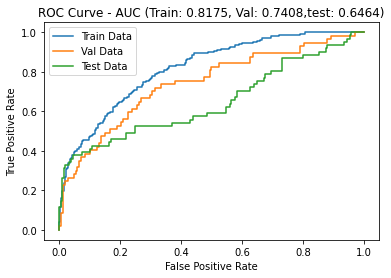

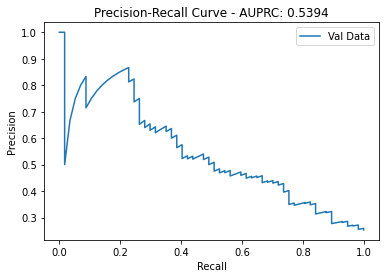

Val Result:

Accuracy Score: 78.22%
Precision Score: 64.29%
Recall Score: 31.58%
F1 score: 42.35%
Confusion Matrix:
[[158  10]
 [ 39  18]]
AUPRC: 0.5394
test Result:

Accuracy Score: 82.67%
Precision Score: 74.07%
Recall Score: 32.79%
F1 score: 45.45%
Confusion Matrix:
[[209   7]
 [ 41  20]]
AUC Result:

mlr AUC: 0.7573 +/- 0.0161 (95% Confidence Interval: 0.7256 - 0.7889)
mlr Accuracy Score: 80.22% +/- 2.00% (95% Confidence Interval: 54.81% - 105.63%)


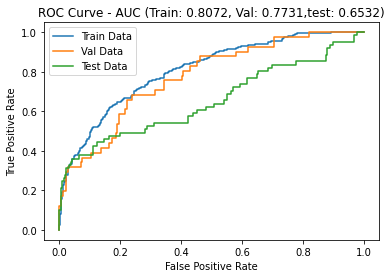

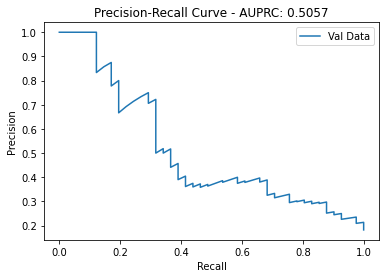

Val Result:

Accuracy Score: 82.22%
Precision Score: 52.00%
Recall Score: 31.71%
F1 score: 39.39%
Confusion Matrix:
[[172  12]
 [ 28  13]]
AUPRC: 0.5057
test Result:

Accuracy Score: 81.95%
Precision Score: 66.67%
Recall Score: 36.07%
F1 score: 46.81%
Confusion Matrix:
[[205  11]
 [ 39  22]]
AUC Result:

mlr AUC: 0.7329 +/- 0.0366 (95% Confidence Interval: 0.6612 - 0.8047)
mlr Accuracy Score: 79.85% +/- 1.71% (95% Confidence Interval: 72.47% - 87.23%)


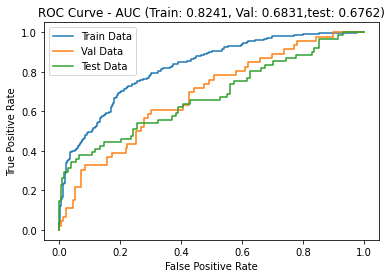

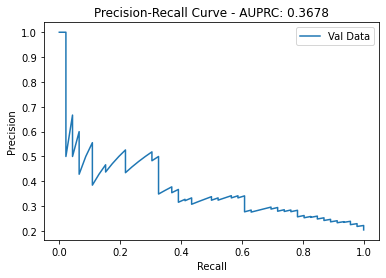

Val Result:

Accuracy Score: 79.11%
Precision Score: 47.06%
Recall Score: 17.39%
F1 score: 25.40%
Confusion Matrix:
[[170   9]
 [ 38   8]]
AUPRC: 0.3678
test Result:

Accuracy Score: 81.59%
Precision Score: 65.62%
Recall Score: 34.43%
F1 score: 45.16%
Confusion Matrix:
[[205  11]
 [ 40  21]]
AUC Result:

mlr AUC: 0.7401 +/- 0.0333 (95% Confidence Interval: 0.6748 - 0.8055)
mlr Accuracy Score: 79.42% +/- 1.66% (95% Confidence Interval: 74.13% - 84.71%)


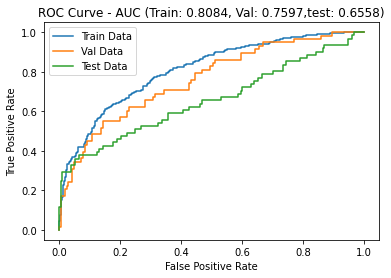

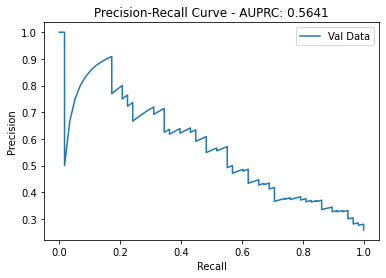

Val Result:

Accuracy Score: 78.12%
Precision Score: 63.64%
Recall Score: 36.21%
F1 score: 46.15%
Confusion Matrix:
[[154  12]
 [ 37  21]]
AUPRC: 0.5641
test Result:

Accuracy Score: 81.59%
Precision Score: 66.67%
Recall Score: 32.79%
F1 score: 43.96%
Confusion Matrix:
[[206  10]
 [ 41  20]]
AUC Result:

mlr AUC: 0.7529 +/- 0.0399 (95% Confidence Interval: 0.6746 - 0.8313)
mlr Accuracy Score: 79.34% +/- 1.50% (95% Confidence Interval: 75.19% - 83.49%)


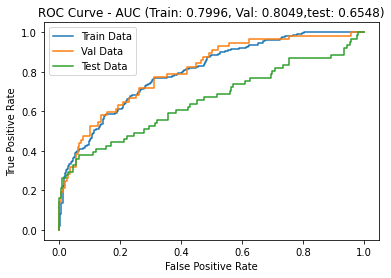

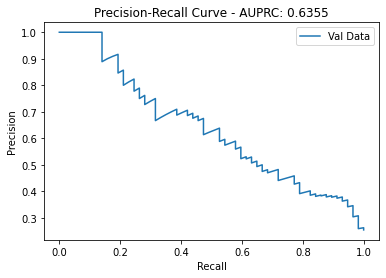

Val Result:

Accuracy Score: 79.02%
Precision Score: 67.86%
Recall Score: 33.33%
F1 score: 44.71%
Confusion Matrix:
[[158   9]
 [ 38  19]]
AUPRC: 0.6355
test Result:

Accuracy Score: 81.23%
Precision Score: 64.52%
Recall Score: 32.79%
F1 score: 43.48%
Confusion Matrix:
[[205  11]
 [ 41  20]]


In [62]:
from sklearn.model_selection import KFold

# 建立空列表，用於儲存各次交叉驗證的評估指標
mlr_accuracy_scores = []
# LDA_precision_scores = []
# LDA_recall_scores = []
# LDA_f1_scores = []
mlr_auc_scores = []

kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建mlr
    mlr_model = LogisticRegression(**mlr_best_params,multi_class='multinomial')
    
    # 訓練模型
    mlr_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = mlr_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = mlr_model.predict_proba(x_train)
    mlr_fpr_train, mlr_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    mlr_auc_train = sklearn.metrics.auc(mlr_fpr_train, mlr_tpr_train)

    y_pred_proba_test = mlr_model.predict_proba(x_test)
    mlr_fpr_test, mlr_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    mlr_auc_test = sklearn.metrics.auc(mlr_fpr_test, mlr_tpr_test)

    # 在測試集上進行預測
    y_pred_last = mlr_model.predict(X_test)

    y_pred_proba_last_test = mlr_model.predict_proba(X_test)
    mlr_fpr_last_test, mlr_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    mlr_auc_last_test = sklearn.metrics.auc(mlr_fpr_last_test, mlr_tpr_last_test)

     # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    mlr_precision_last, mlr_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    mlr_auprc_last = sklearn.metrics.auc(mlr_recall_last, mlr_precision_last)   

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

        # 計算模型的準確率或其他評估指標-------------
    mlr_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # LDA_precision = sklearn.metrics.precision_score(y_test_cv, y_pred)
    # LDA_recall = sklearn.metrics.recall_score(y_test_cv, y_pred)
    # LDA_f1 = sklearn.metrics.f1_score(y_test_cv, y_pred)

    # 將評估指標添加到列表中
    mlr_accuracy_scores.append(mlr_accuracy)
    # LDA_precision_scores.append(LDA_precision)
    # LDA_recall_scores.append(LDA_recall)
    # LDA_f1_scores.append(LDA_f1)
    #--------------------------------------------
    # 將 AUC 添加到列表中
    mlr_auc_scores.append(mlr_auc_test)

    # 計算評估指標的平均值和標準差
    mlr_accuracy_mean = np.mean(mlr_accuracy_scores)
    mlr_accuracy_std = np.std(mlr_accuracy_scores)
    # LDA_precision_mean = np.mean(LDA_precision_scores)
    # LDA_precision_std = np.std(LDA_precision_scores)
    # LDA_recall_mean = np.mean(LDA_recall_scores)
    # LDA_recall_std = np.std(LDA_recall_scores)
    # LDA_f1_mean = np.mean(LDA_f1_scores)
    # LDA_f1_std = np.std(LDA_f1_scores)

    # 使用 bootstrap 方法計算 AUC 的信賴區間
    bootstrap_auc = resample(mlr_auc_scores, replace=True, n_samples=1000, random_state=42)
    auc_mean = np.mean(bootstrap_auc)
    auc_std = np.std(bootstrap_auc)
    confidence = 0.95
    auc_interval = stats.t.interval(confidence, len(bootstrap_auc) - 1, loc=auc_mean, scale=auc_std)
    mlr_accuracy_interval = stats.t.interval(confidence, len(mlr_accuracy_scores) - 1, loc=mlr_accuracy_mean, scale=mlr_accuracy_std)
    # LDA_precision_interval = stats.t.interval(confidence, len(LDA_precision_scores) - 1, loc=LDA_precision_mean, scale=LDA_precision_std)
    # LDA_recall_interval = stats.t.interval(confidence, len(LDA_recall_scores) - 1, loc=LDA_recall_mean, scale=LDA_recall_std)
    # LDA_f1_interval = stats.t.interval(confidence, len(LDA_f1_scores) - 1, loc=LDA_f1_mean, scale=LDA_f1_std)

    # 打印結果
    print("AUC Result:\n")
    print(f"mlr AUC: {auc_mean:.4f} +/- {auc_std:.4f} (95% Confidence Interval: {auc_interval[0]:.4f} - {auc_interval[1]:.4f})")
    print(f"mlr Accuracy Score: {mlr_accuracy_mean*100:.2f}% +/- {mlr_accuracy_std*100:.2f}% (95% Confidence Interval: {mlr_accuracy_interval[0]*100:.2f}% - {mlr_accuracy_interval[1]*100:.2f}%)")

    # 繪製ROC曲線
    plt.plot(mlr_fpr_train, mlr_tpr_train, label="Train Data")
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="Val Data")
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {mlr_auc_train:.4f}, Val: {mlr_auc_test:.4f},test: {mlr_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

MLP

In [45]:
from sklearn.neural_network import MLPClassifier

# 定義參數空間
# param_grid = {
#     'hidden_layer_sizes': [(100,), (100, 100), (50, 50, 50)],
#     'activation': ['relu', 'logistic'],
#     'solver': ['adam', 'sgd'],
#     'max_iter': [100, 200, 500],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }

param_grid = {
    'hidden_layer_sizes': [ (100, 100)],
    'activation': ['identity'],
    'solver': ['lbfgs'],
    'max_iter': [300],
    'alpha': [0.001],
    'learning_rate': ['invscaling'],
    'learning_rate_init': [ 0.001],
    'batch_size': ['auto'],
    'power_t': [0.5]
}
# 最佳AUC: 0.7128222996003493，最佳參數組合：{'activation': 'identity', 'alpha': 0.001, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 300, 'power_t': 0.5, 'solver': 'lbfgs'}
# 最佳AUC: 0.7128222996003493，最佳參數組合：{'activation': 'identity', 'alpha': 0.001, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 300, 'power_t': 0.5, 'solver': 'lbfgs'}
# param_grid = {
#     'hidden_layer_sizes': [(100,), (100, 100), (50, 50, 50)],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs'],
#     'alpha': [0.001, 0.01],
#     'batch_size': ['auto', 200],
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'power_t': [0.5],
#     'max_iter': [100, 200, 300],
    # 'shuffle': [True, False],
    # 'random_state': [None],
    # 'tol': [1e-4],
    # 'verbose': [True, False],
    # 'warm_start': [True, False],
    # 'momentum': [0.9],
    # 'nesterovs_momentum': [True, False],
    # 'early_stopping': [True, False],
    # 'validation_fraction': [0.1],
    # 'beta_1': [0.9],
    # 'beta_2': [0.999],
    # 'epsilon': [1e-8],
    # 'n_iter_no_change': [10],
    # 'max_fun': [15000]
# }
# 最佳AUC: 0.7135049939609376，最佳參數組合：{'activation': 'identity', 'alpha': 0.01, 'batch_size': 'auto', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'max_iter': 300, 'power_t': 0.5, 'solver': 'lbfgs'}
mlp = MLPClassifier(early_stopping=True)

# 定義Grid Search對象
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=False, scoring='roc_auc', return_train_score=True)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)

# 輸出最佳參數組合
# print("Best Parameters: ", grid_search.best_params_)

mlp_best_params = grid_search.best_params_

# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


最佳AUC: 0.6660667344274407，最佳參數組合：{'activation': 'identity', 'alpha': 0.001, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 300, 'power_t': 0.5, 'solver': 'lbfgs'}
訓練集平均AUC: 0.6773151587145115, 標準差: 0.09805563008763755, 驗證集平均AUC: 0.6660667344274407, 標準差: 0.08958793797053693, 參數組合: {'activation': 'identity', 'alpha': 0.001, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 300, 'power_t': 0.5, 'solver': 'lbfgs'}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


AUC Result:

mlp AUC: 0.4909 +/- 0.0000 (95% Confidence Interval: 0.4909 - 0.4909)
mlp Accuracy Score: 74.67% +/- 0.00% (95% Confidence Interval: nan% - nan%)


lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
invalid value encountered in multiply
invalid value encountered in multiply


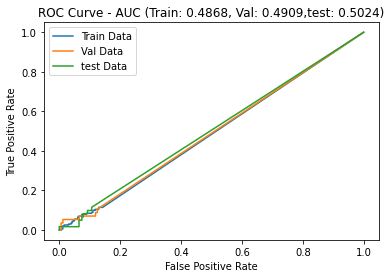

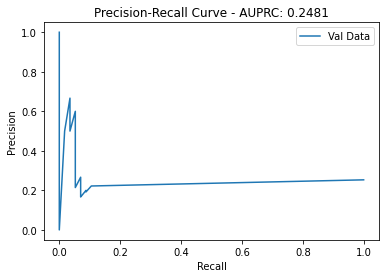

Val Result:

Accuracy Score: 74.67%
Precision Score: 0.00%
Recall Score: 0.00%
F1 score: 0.00%
Confusion Matrix:
[[168   0]
 [ 57   0]]
AUPRC: 0.2481
test Result:

Accuracy Score: 77.98%
Precision Score: 0.00%
Recall Score: 0.00%
F1 score: 0.00%
Confusion Matrix:
[[216   0]
 [ 61   0]]


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


AUC Result:

mlp AUC: 0.6275 +/- 0.1339 (95% Confidence Interval: 0.3647 - 0.8903)
mlp Accuracy Score: 79.33% +/- 4.67% (95% Confidence Interval: 64.48% - 94.18%)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


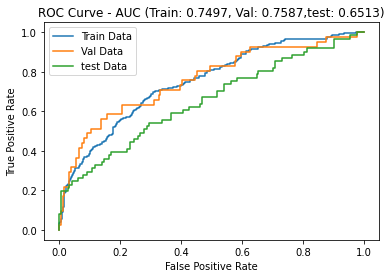

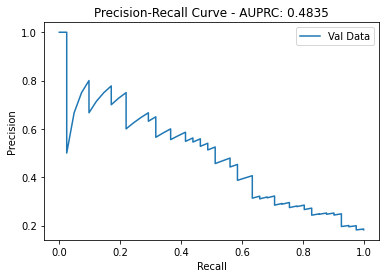

Val Result:

Accuracy Score: 84.00%
Precision Score: 64.71%
Recall Score: 26.83%
F1 score: 37.93%
Confusion Matrix:
[[178   6]
 [ 30  11]]
AUPRC: 0.4835
test Result:

Accuracy Score: 79.06%
Precision Score: 55.56%
Recall Score: 24.59%
F1 score: 34.09%
Confusion Matrix:
[[204  12]
 [ 46  15]]


In [71]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 建立空列表，用於儲存各次交叉驗證的評估指標
mlp_accuracy_scores = []
# LDA_precision_scores = []
# LDA_recall_scores = []
# LDA_f1_scores = []
mlp_auc_scores = []

count = 0
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 2:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建MLP模型
    mlp_model = MLPClassifier(**mlp_best_params, random_state=70)
    
    # 訓練模型
    mlp_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = mlp_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = mlp_model.predict_proba(x_train)
    mlp_fpr_train, mlp_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    mlp_auc_train = sklearn.metrics.auc(mlp_fpr_train, mlp_tpr_train)

    y_pred_proba_test = mlp_model.predict_proba(x_test)
    mlp_fpr_test, mlp_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    mlp_auc_test = sklearn.metrics.auc(mlp_fpr_test, mlp_tpr_test)

    # 在測試集上進行預測
    y_pred_last = mlp_model.predict(X_test)

    y_pred_proba_last_test = mlp_model.predict_proba(X_test)
    mlp_fpr_last_test, mlp_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    mlp_auc_last_test = sklearn.metrics.auc(mlp_fpr_last_test, mlp_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    mlp_precision_last, mlp_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    mlp_auprc_last = sklearn.metrics.auc(mlp_recall_last, mlp_precision_last)

        # 計算模型的準確率或其他評估指標-------------
    mlp_accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # LDA_precision = sklearn.metrics.precision_score(y_test_cv, y_pred)
    # LDA_recall = sklearn.metrics.recall_score(y_test_cv, y_pred)
    # LDA_f1 = sklearn.metrics.f1_score(y_test_cv, y_pred)

    # 將評估指標添加到列表中
    mlp_accuracy_scores.append(mlp_accuracy)
    # LDA_precision_scores.append(LDA_precision)
    # LDA_recall_scores.append(LDA_recall)
    # LDA_f1_scores.append(LDA_f1)
    #--------------------------------------------
    # 將 AUC 添加到列表中
    mlp_auc_scores.append(mlp_auc_test)

    # 計算評估指標的平均值和標準差
    mlp_accuracy_mean = np.mean(mlp_accuracy_scores)
    mlp_accuracy_std = np.std(mlp_accuracy_scores)
    # LDA_precision_mean = np.mean(LDA_precision_scores)
    # LDA_precision_std = np.std(LDA_precision_scores)
    # LDA_recall_mean = np.mean(LDA_recall_scores)
    # LDA_recall_std = np.std(LDA_recall_scores)
    # LDA_f1_mean = np.mean(LDA_f1_scores)
    # LDA_f1_std = np.std(LDA_f1_scores)

    # 使用 bootstrap 方法計算 AUC 的信賴區間
    bootstrap_auc = resample(mlp_auc_scores, replace=True, n_samples=1000, random_state=42)
    auc_mean = np.mean(bootstrap_auc)
    auc_std = np.std(bootstrap_auc)
    confidence = 0.95
    auc_interval = stats.t.interval(confidence, len(bootstrap_auc) - 1, loc=auc_mean, scale=auc_std)
    mlp_accuracy_interval = stats.t.interval(confidence, len(mlp_accuracy_scores) + 1, loc=mlp_accuracy_mean, scale=mlp_accuracy_std)
    # LDA_precision_interval = stats.t.interval(confidence, len(LDA_precision_scores) - 1, loc=LDA_precision_mean, scale=LDA_precision_std)
    # LDA_recall_interval = stats.t.interval(confidence, len(LDA_recall_scores) - 1, loc=LDA_recall_mean, scale=LDA_recall_std)
    # LDA_f1_interval = stats.t.interval(confidence, len(LDA_f1_scores) - 1, loc=LDA_f1_mean, scale=LDA_f1_std)

    # 打印結果
    print("AUC Result:\n")
    print(f"mlp AUC: {auc_mean:.4f} +/- {auc_std:.4f} (95% Confidence Interval: {auc_interval[0]:.4f} - {auc_interval[1]:.4f})")
    print(f"mlp Accuracy Score: {mlp_accuracy_mean*100:.2f}% +/- {mlp_accuracy_std*100:.2f}% (95% Confidence Interval: {mlp_accuracy_interval[0]*100:.2f}% - {mlp_accuracy_interval[1]*100:.2f}%)")

    # 繪製ROC曲線
    plt.plot(mlp_fpr_train, mlp_tpr_train, label="Train Data")
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="Val Data")
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {mlp_auc_train:.4f}, Val: {mlp_auc_test:.4f},test: {mlp_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    
    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

疊圖AUC-train

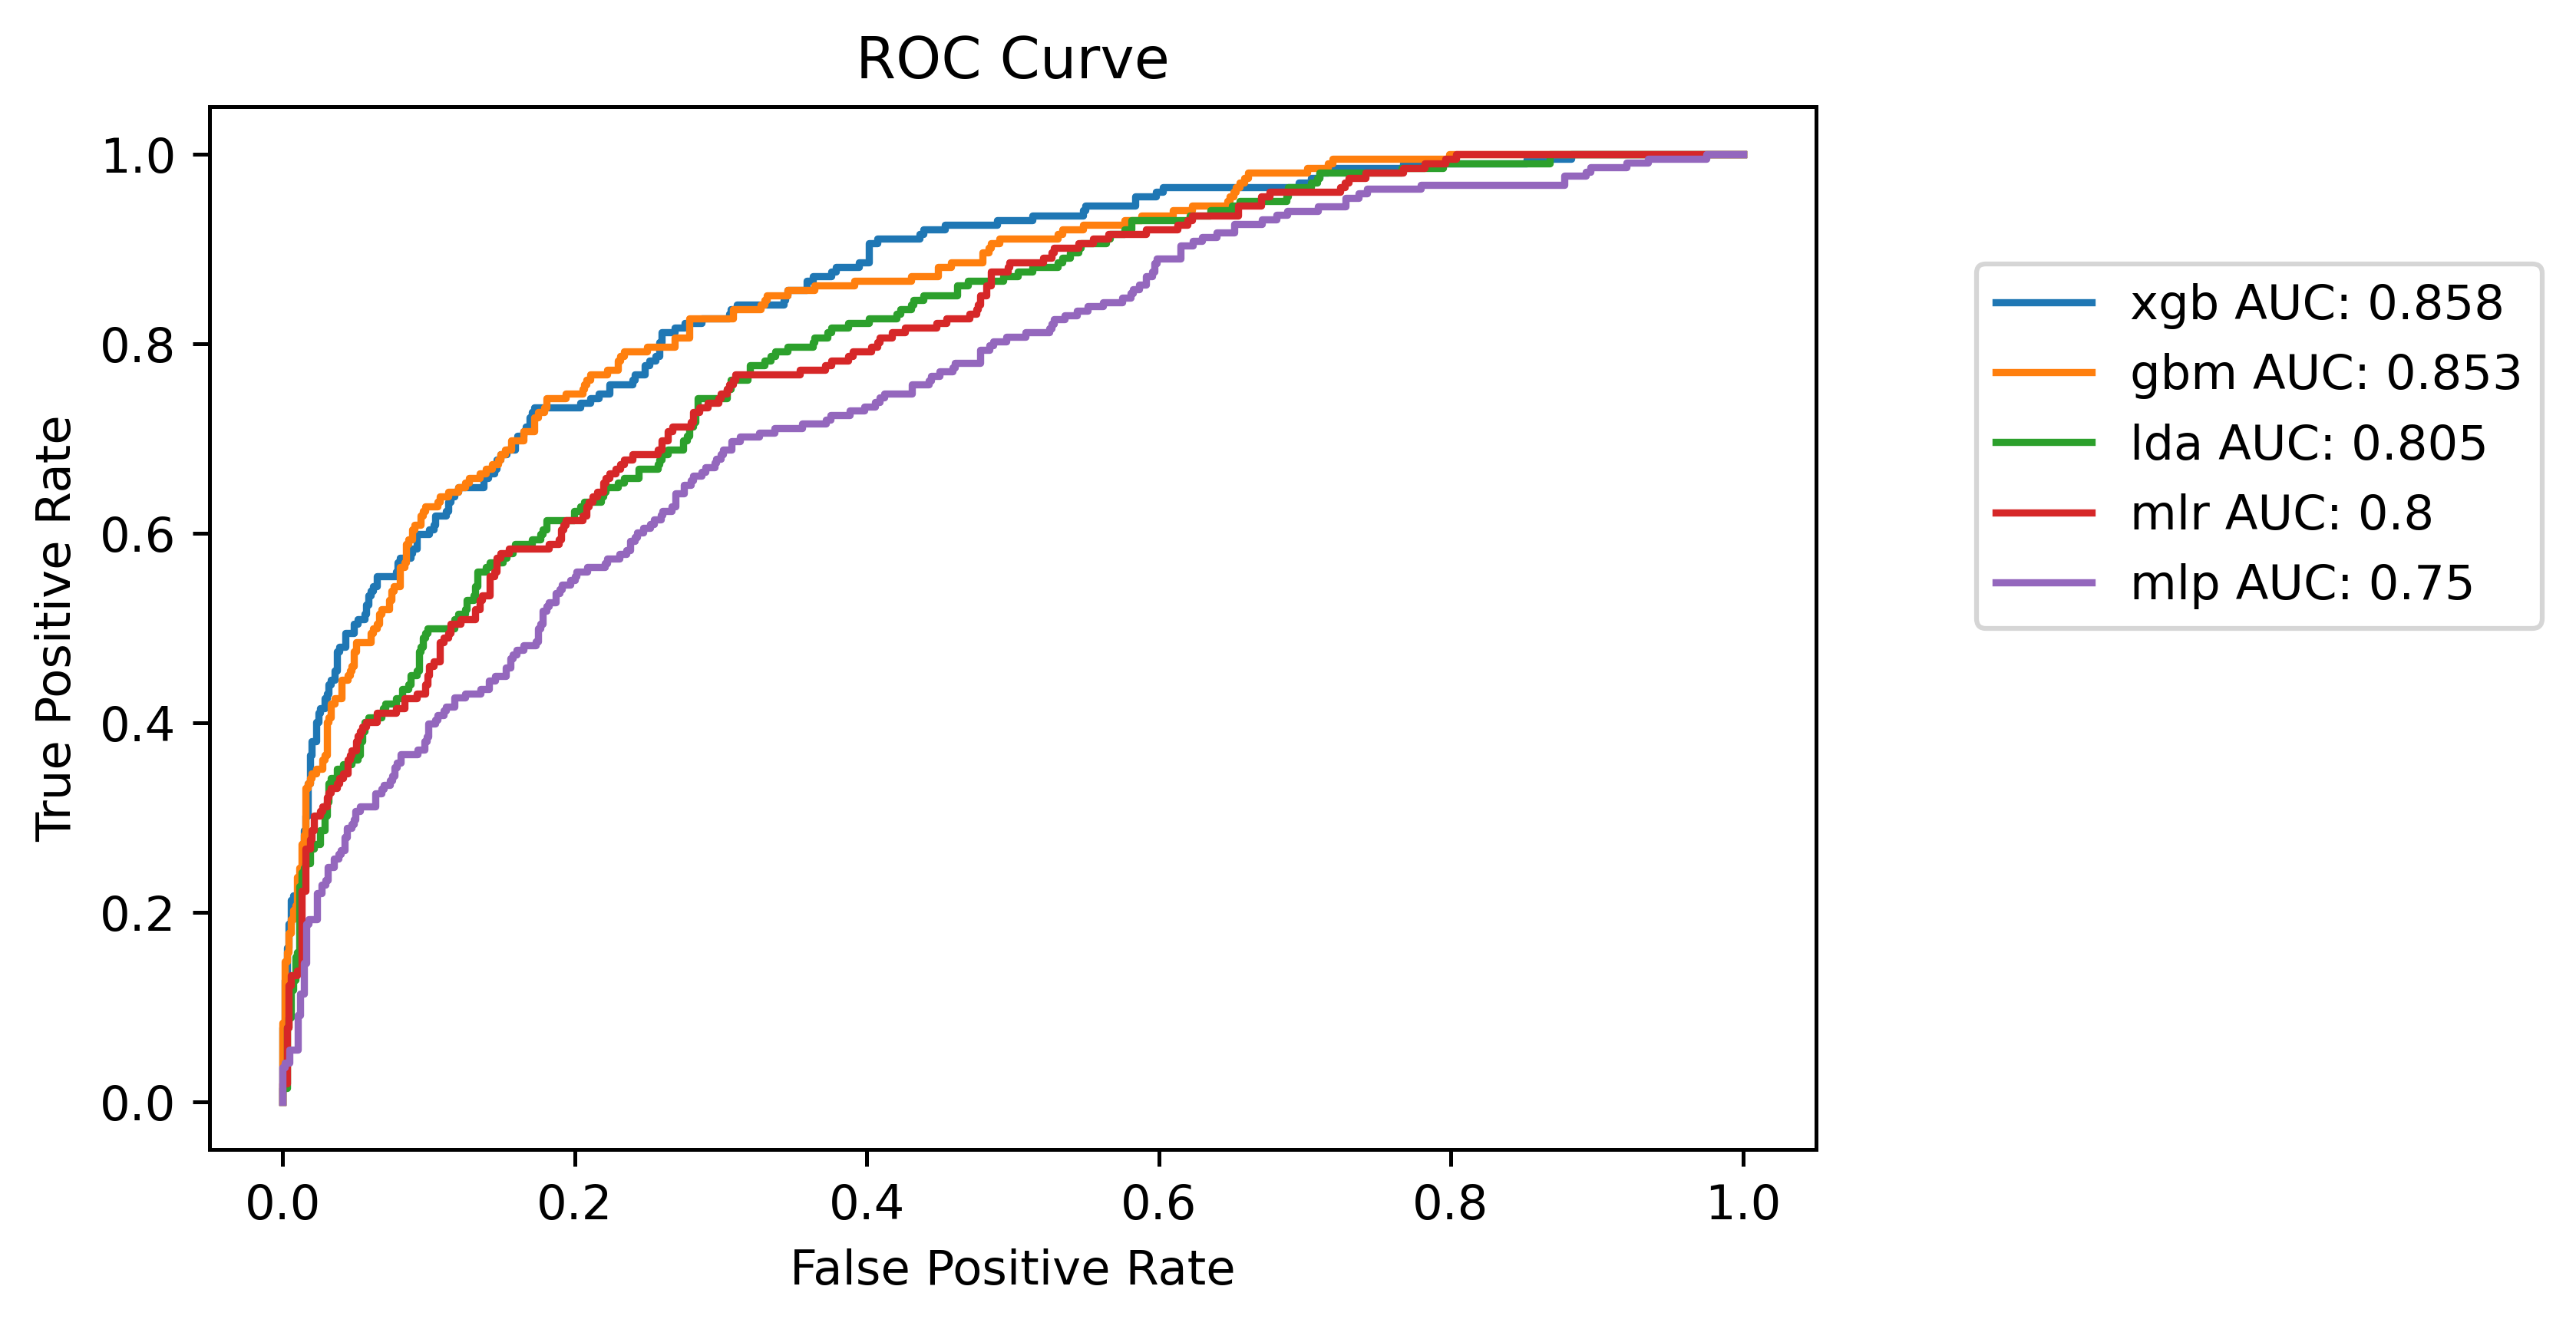

In [49]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_train, xgb_tpr_train, label="xgb AUC: "+str(round(xgb_auc_train,3)))
    plt.plot(gbm_fpr_train, gbm_tpr_train, label="gbm AUC: "+str(round(gbm_auc_train,3)))
    plt.plot(lda_fpr_train, lda_tpr_train, label="lda AUC: "+str(round(lda_auc_train,3)))
    plt.plot(mlr_fpr_train, mlr_tpr_train, label="mlr AUC: "+str(round(mlr_auc_train,3)))
    plt.plot(mlp_fpr_train, mlp_tpr_train, label="mlp AUC: "+str(round(mlp_auc_train,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖AUC-train

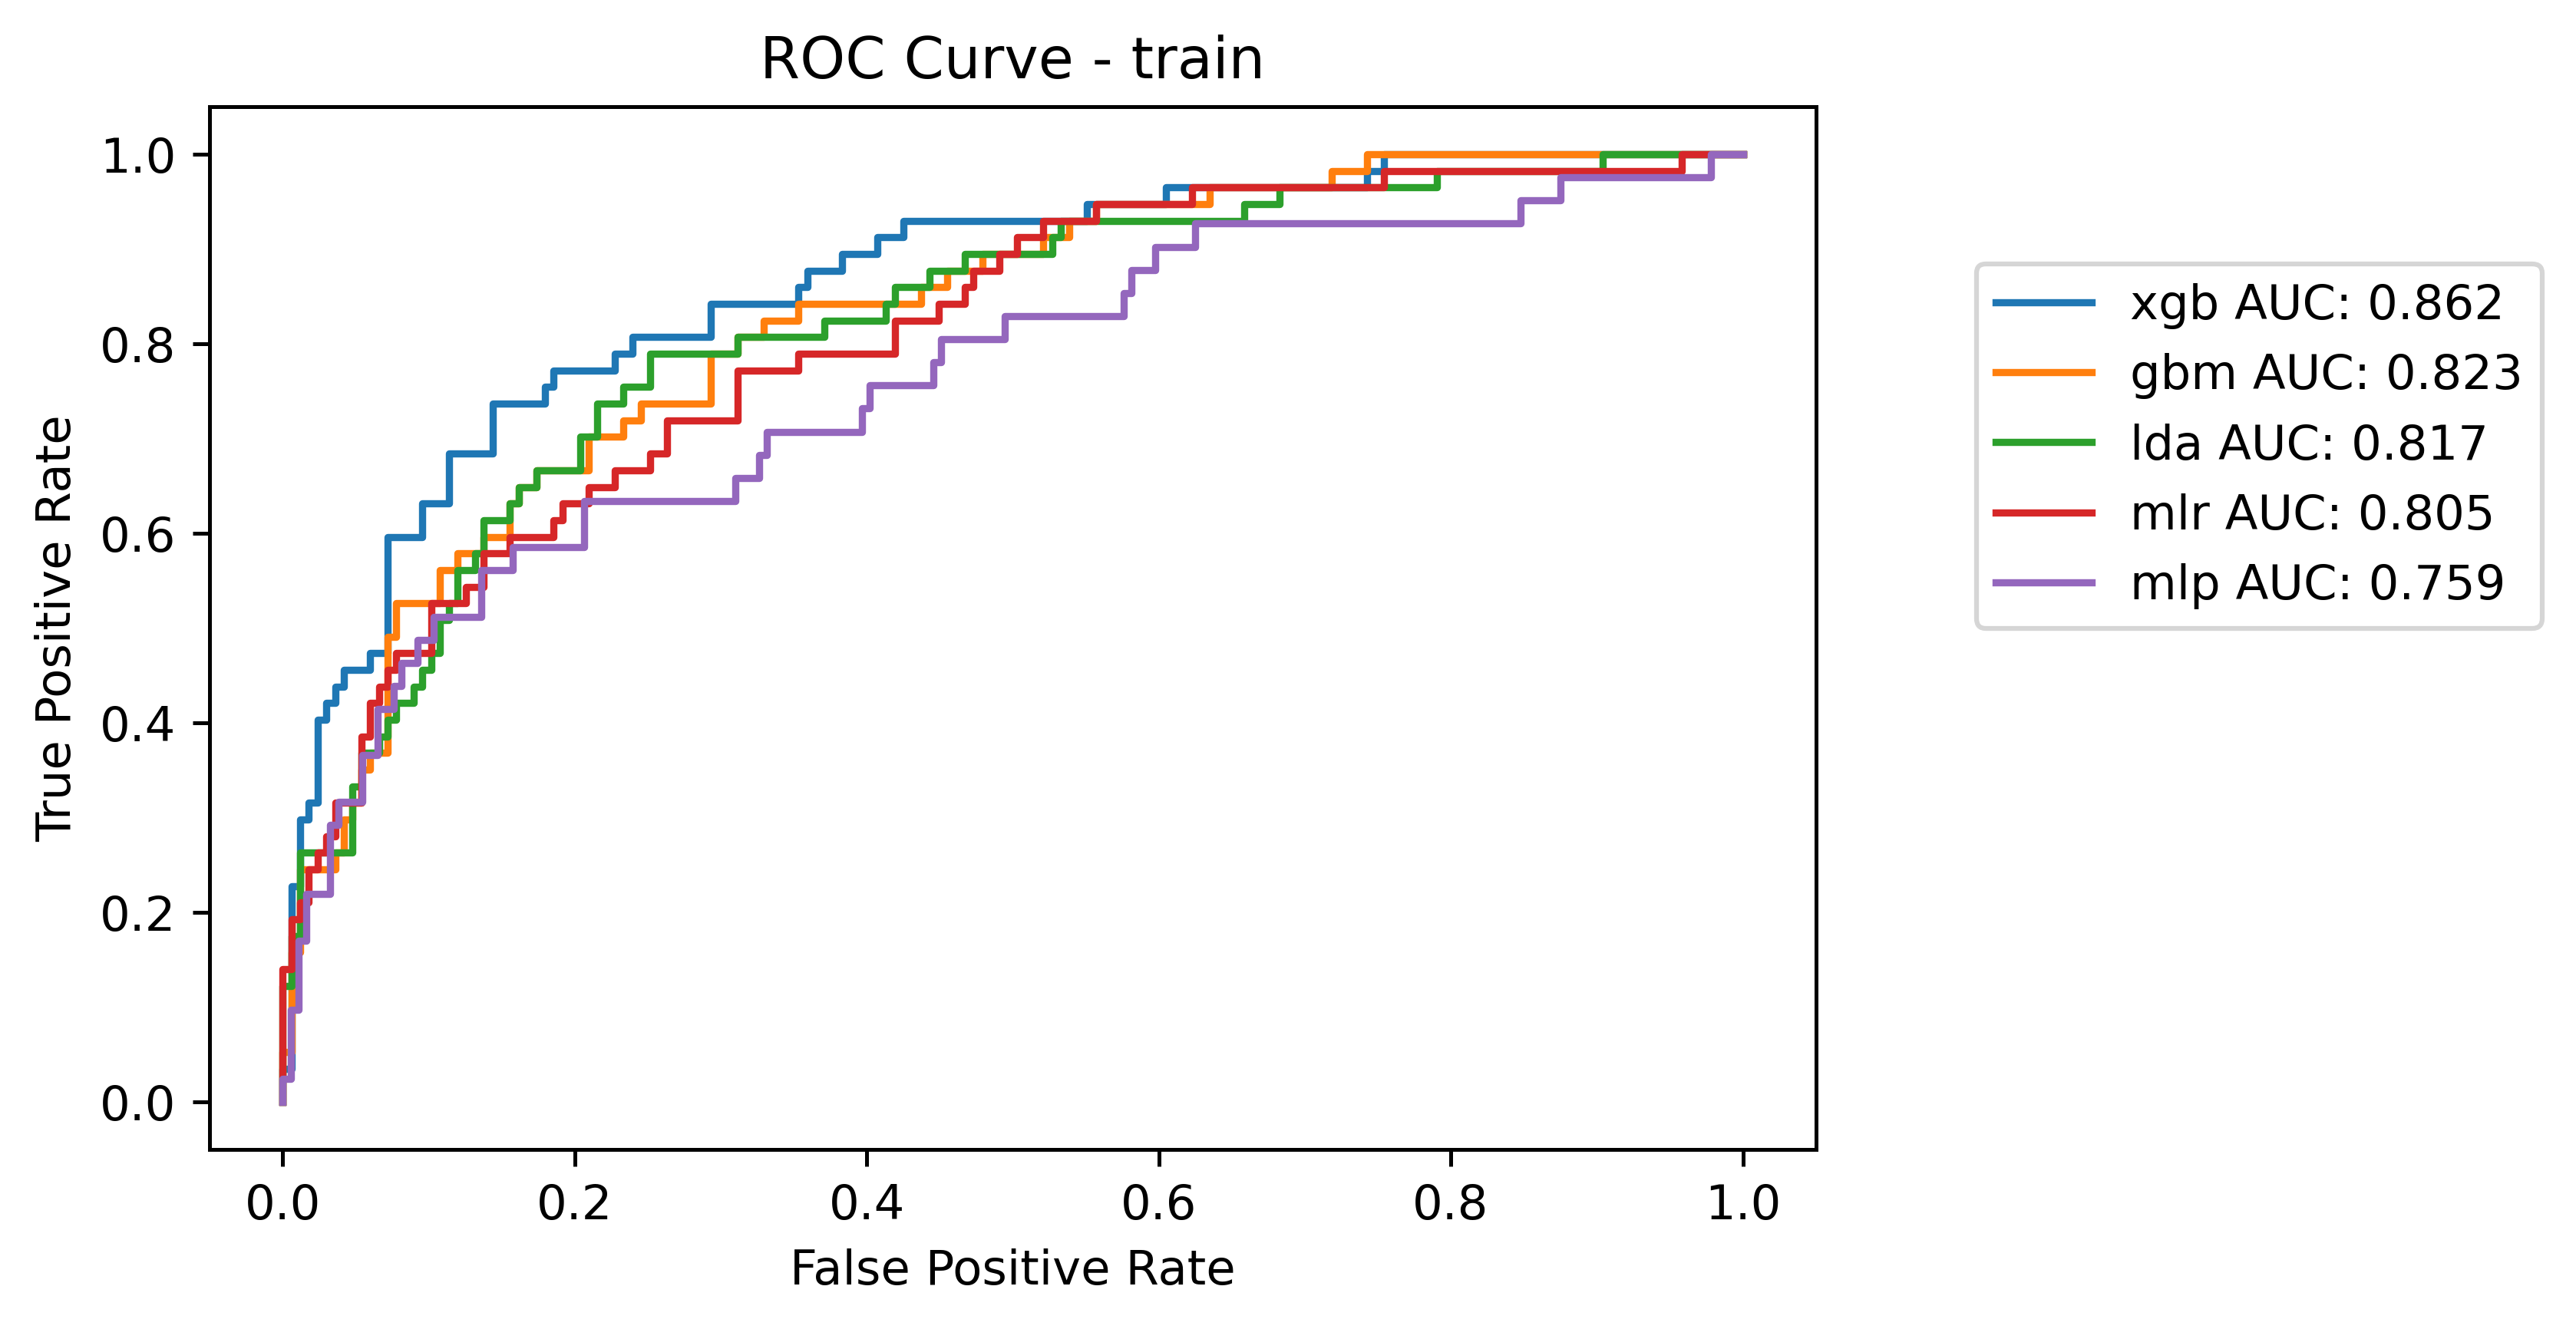

In [48]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="xgb AUC: "+str(round(xgb_auc_test,3)))
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="gbm AUC: "+str(round(gbm_auc_test,3)))
    plt.plot(lda_fpr_test, lda_tpr_test, label="lda AUC: "+str(round(lda_auc_test,3)))
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="mlr AUC: "+str(round(mlr_auc_test,3)))
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="mlp AUC: "+str(round(mlp_auc_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - train')
    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖AUC-test

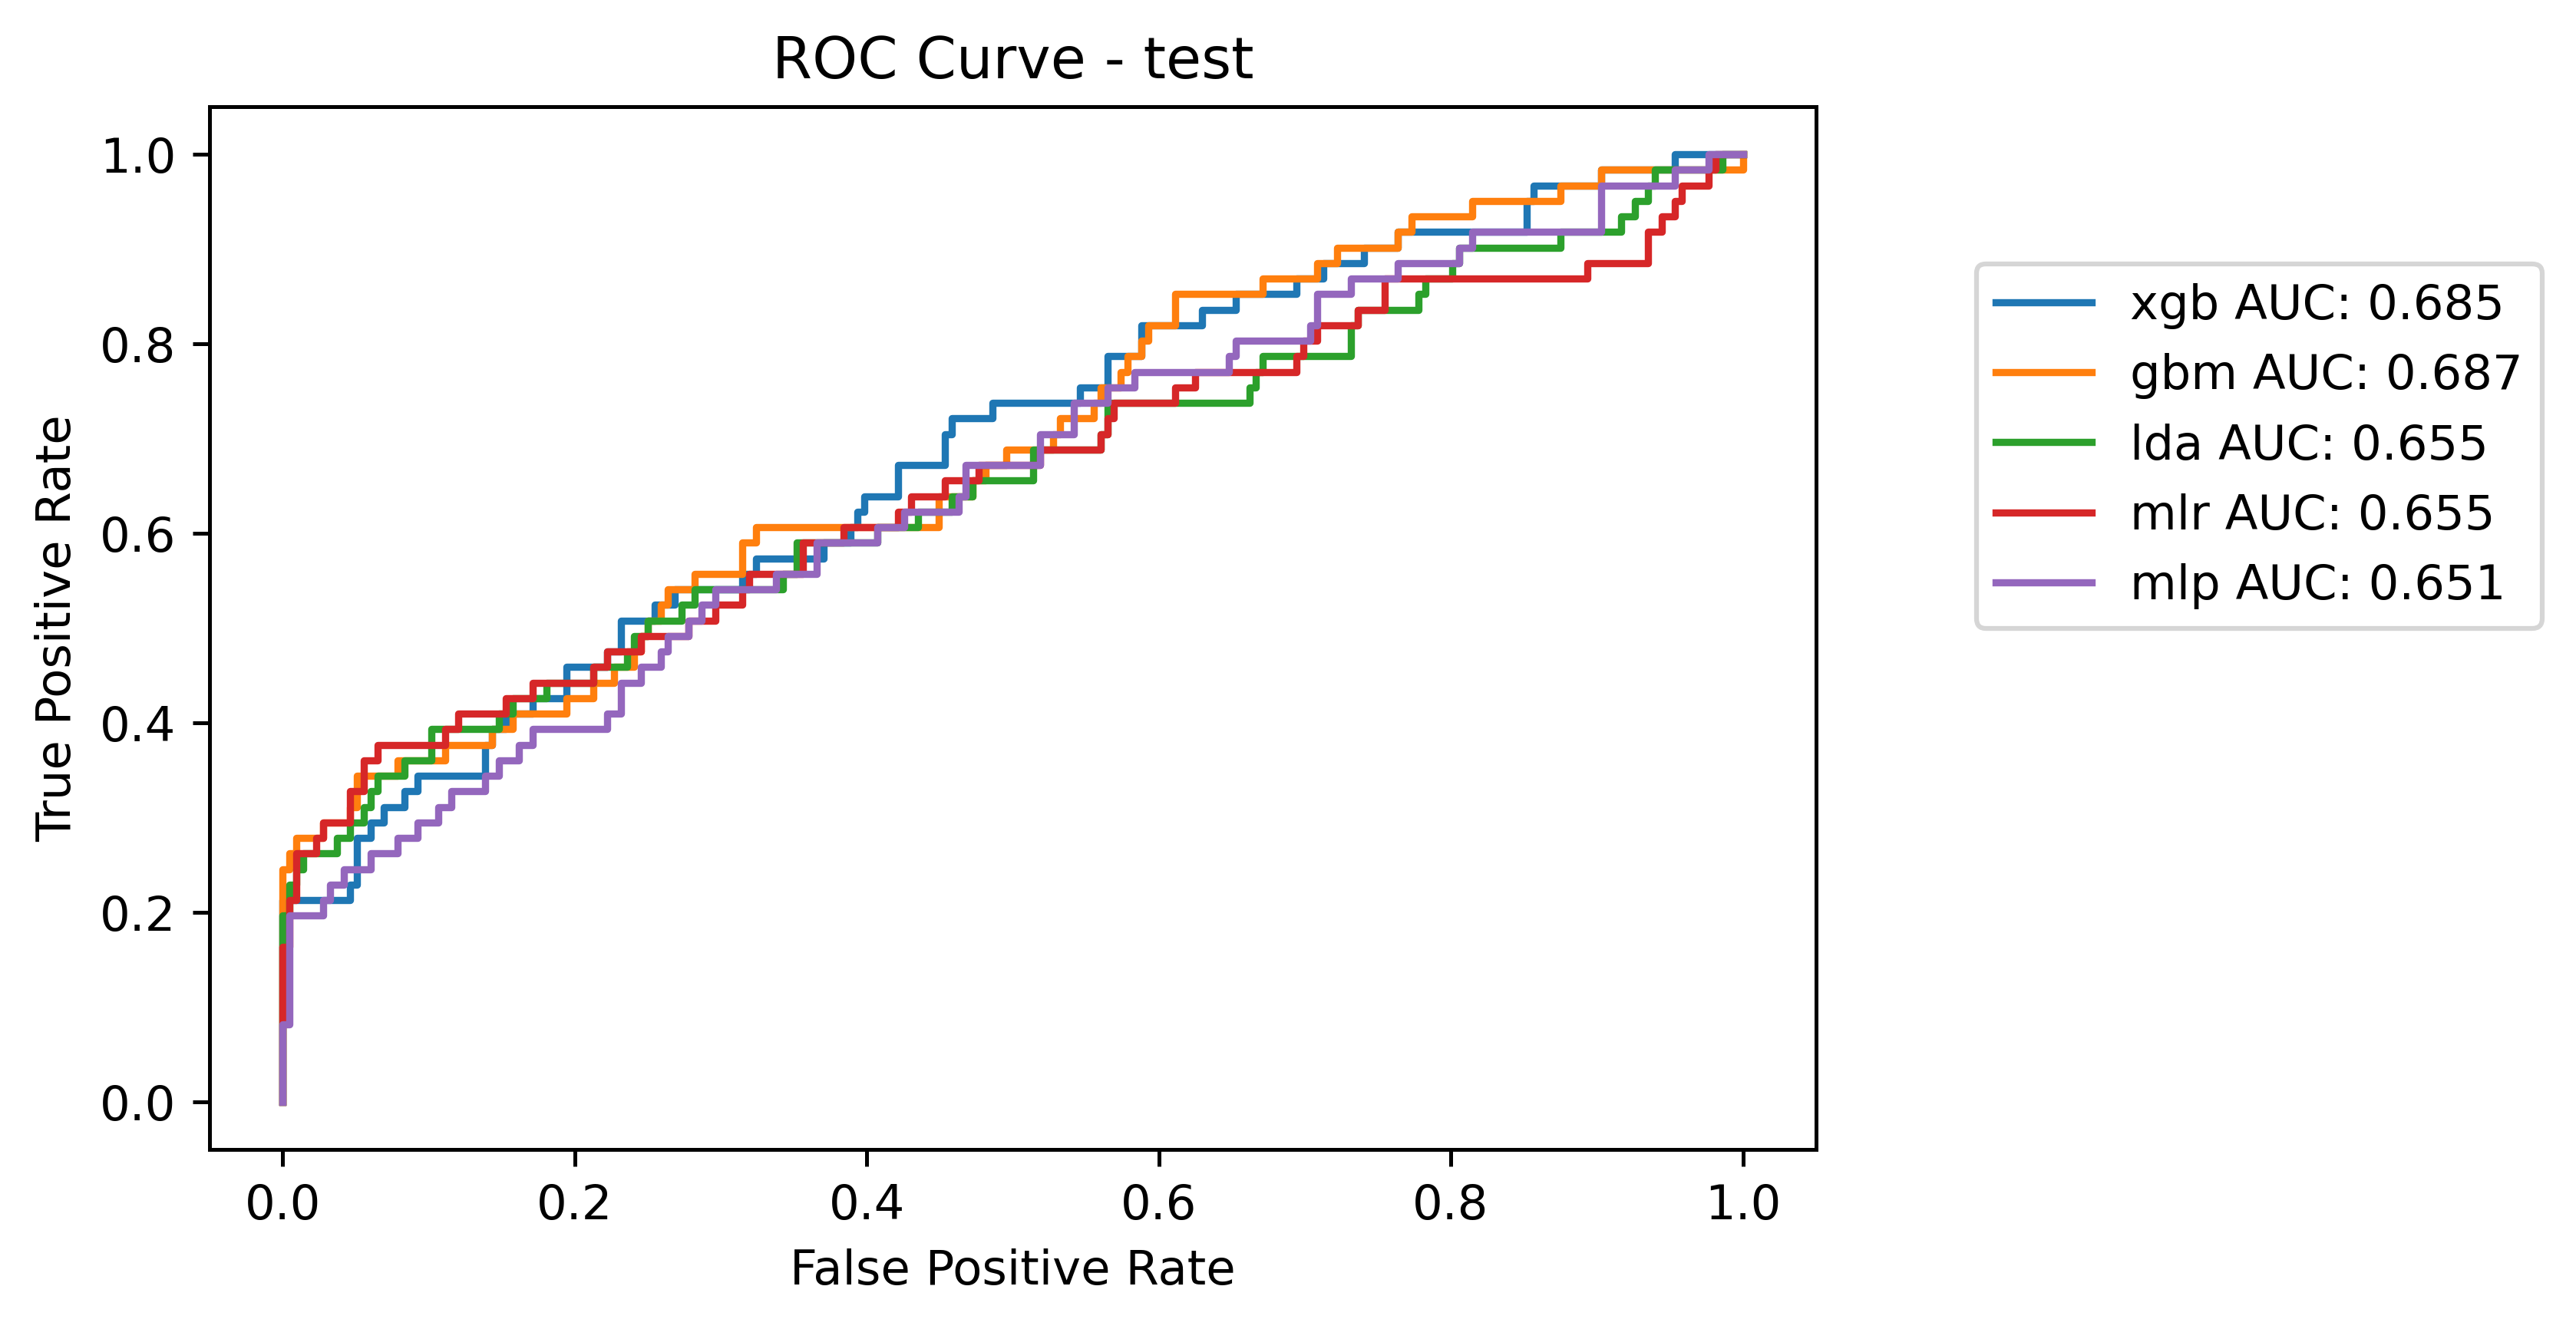

In [50]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="xgb AUC: "+str(round(xgb_auc_last_test,3)))
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="gbm AUC: "+str(round(gbm_auc_last_test,3)))
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="lda AUC: "+str(round(lda_auc_last_test,3)))
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="mlr AUC: "+str(round(mlr_auc_last_test,3)))
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="mlp AUC: "+str(round(mlp_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - test')
    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖AUPRC-TEST

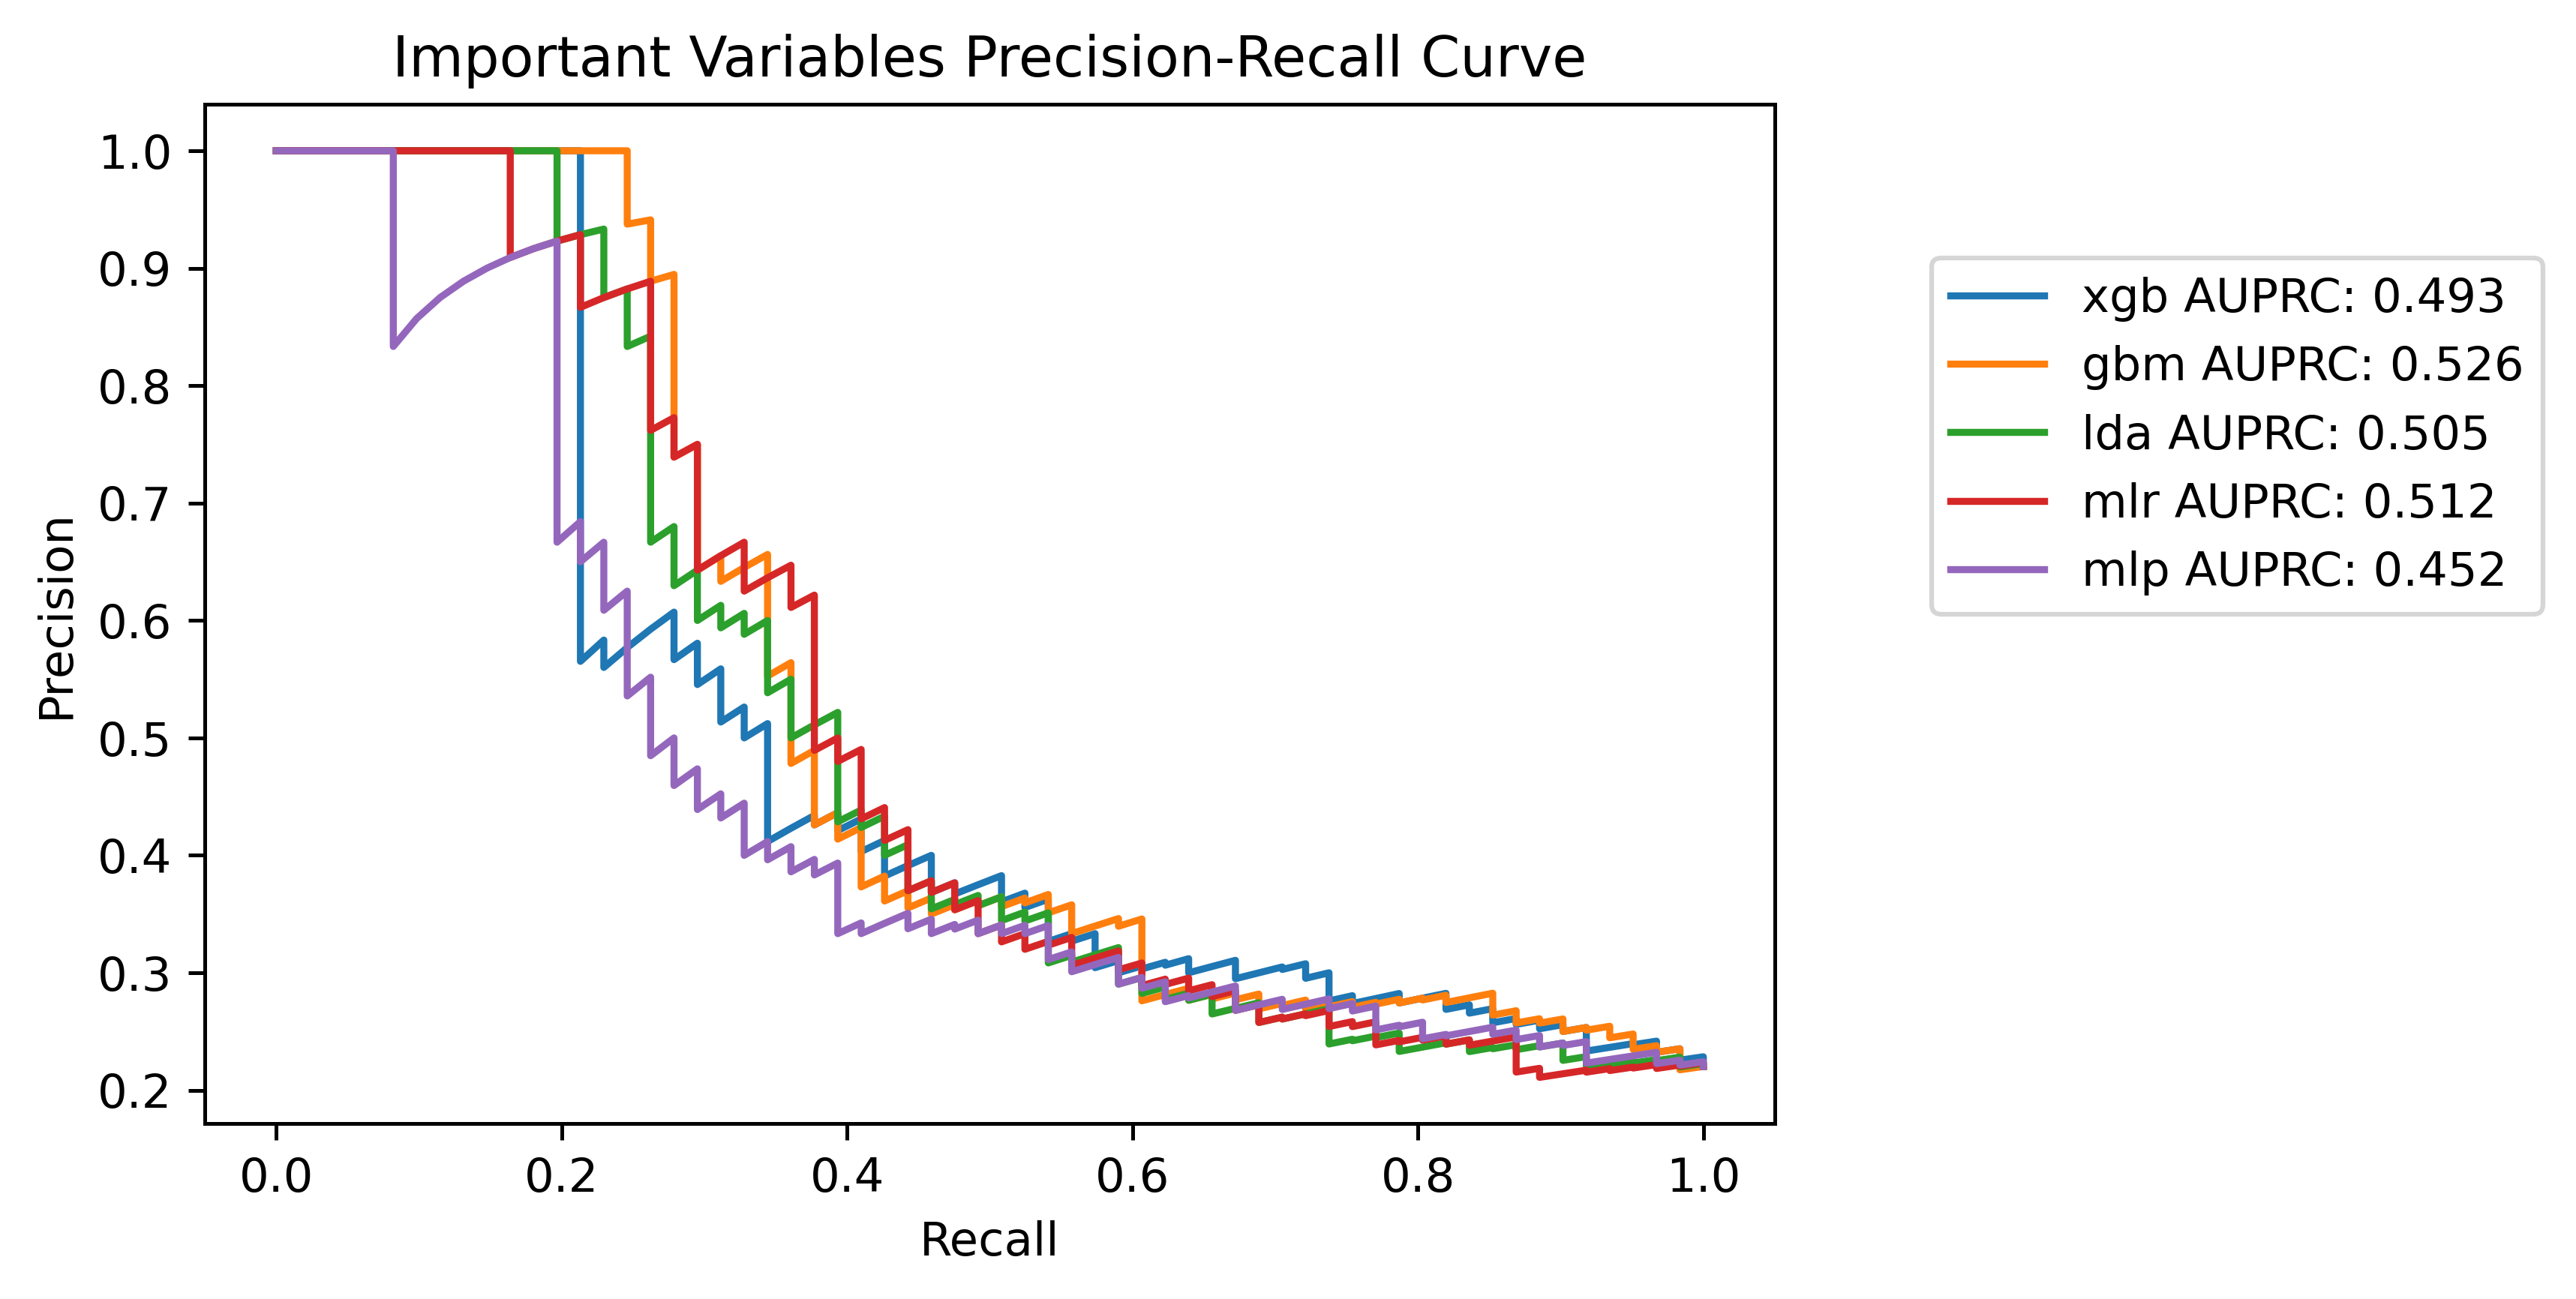

In [51]:
    # 繪製P-R曲線
    plt.figure(dpi=450)
    plt.plot(xgb_recall_last, xgb_precision_last, label="xgb AUPRC: "+str(round(xgb_auprc_last,3)))
    plt.plot(gbm_recall_last, gbm_precision_last, label="gbm AUPRC: "+str(round(gbm_auprc_last,3)))
    plt.plot(lda_recall_last, lda_precision_last, label="lda AUPRC: "+str(round(lda_auprc_last,3)))
    plt.plot(mlr_recall_last, mlr_precision_last, label="mlr AUPRC: "+str(round(mlr_auprc_last,3)))
    plt.plot(mlp_recall_last, mlp_precision_last, label="mlp AUPRC: "+str(round(mlp_auprc_last,3)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Important Variables Precision-Recall Curve')

    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖 train - test - xgb

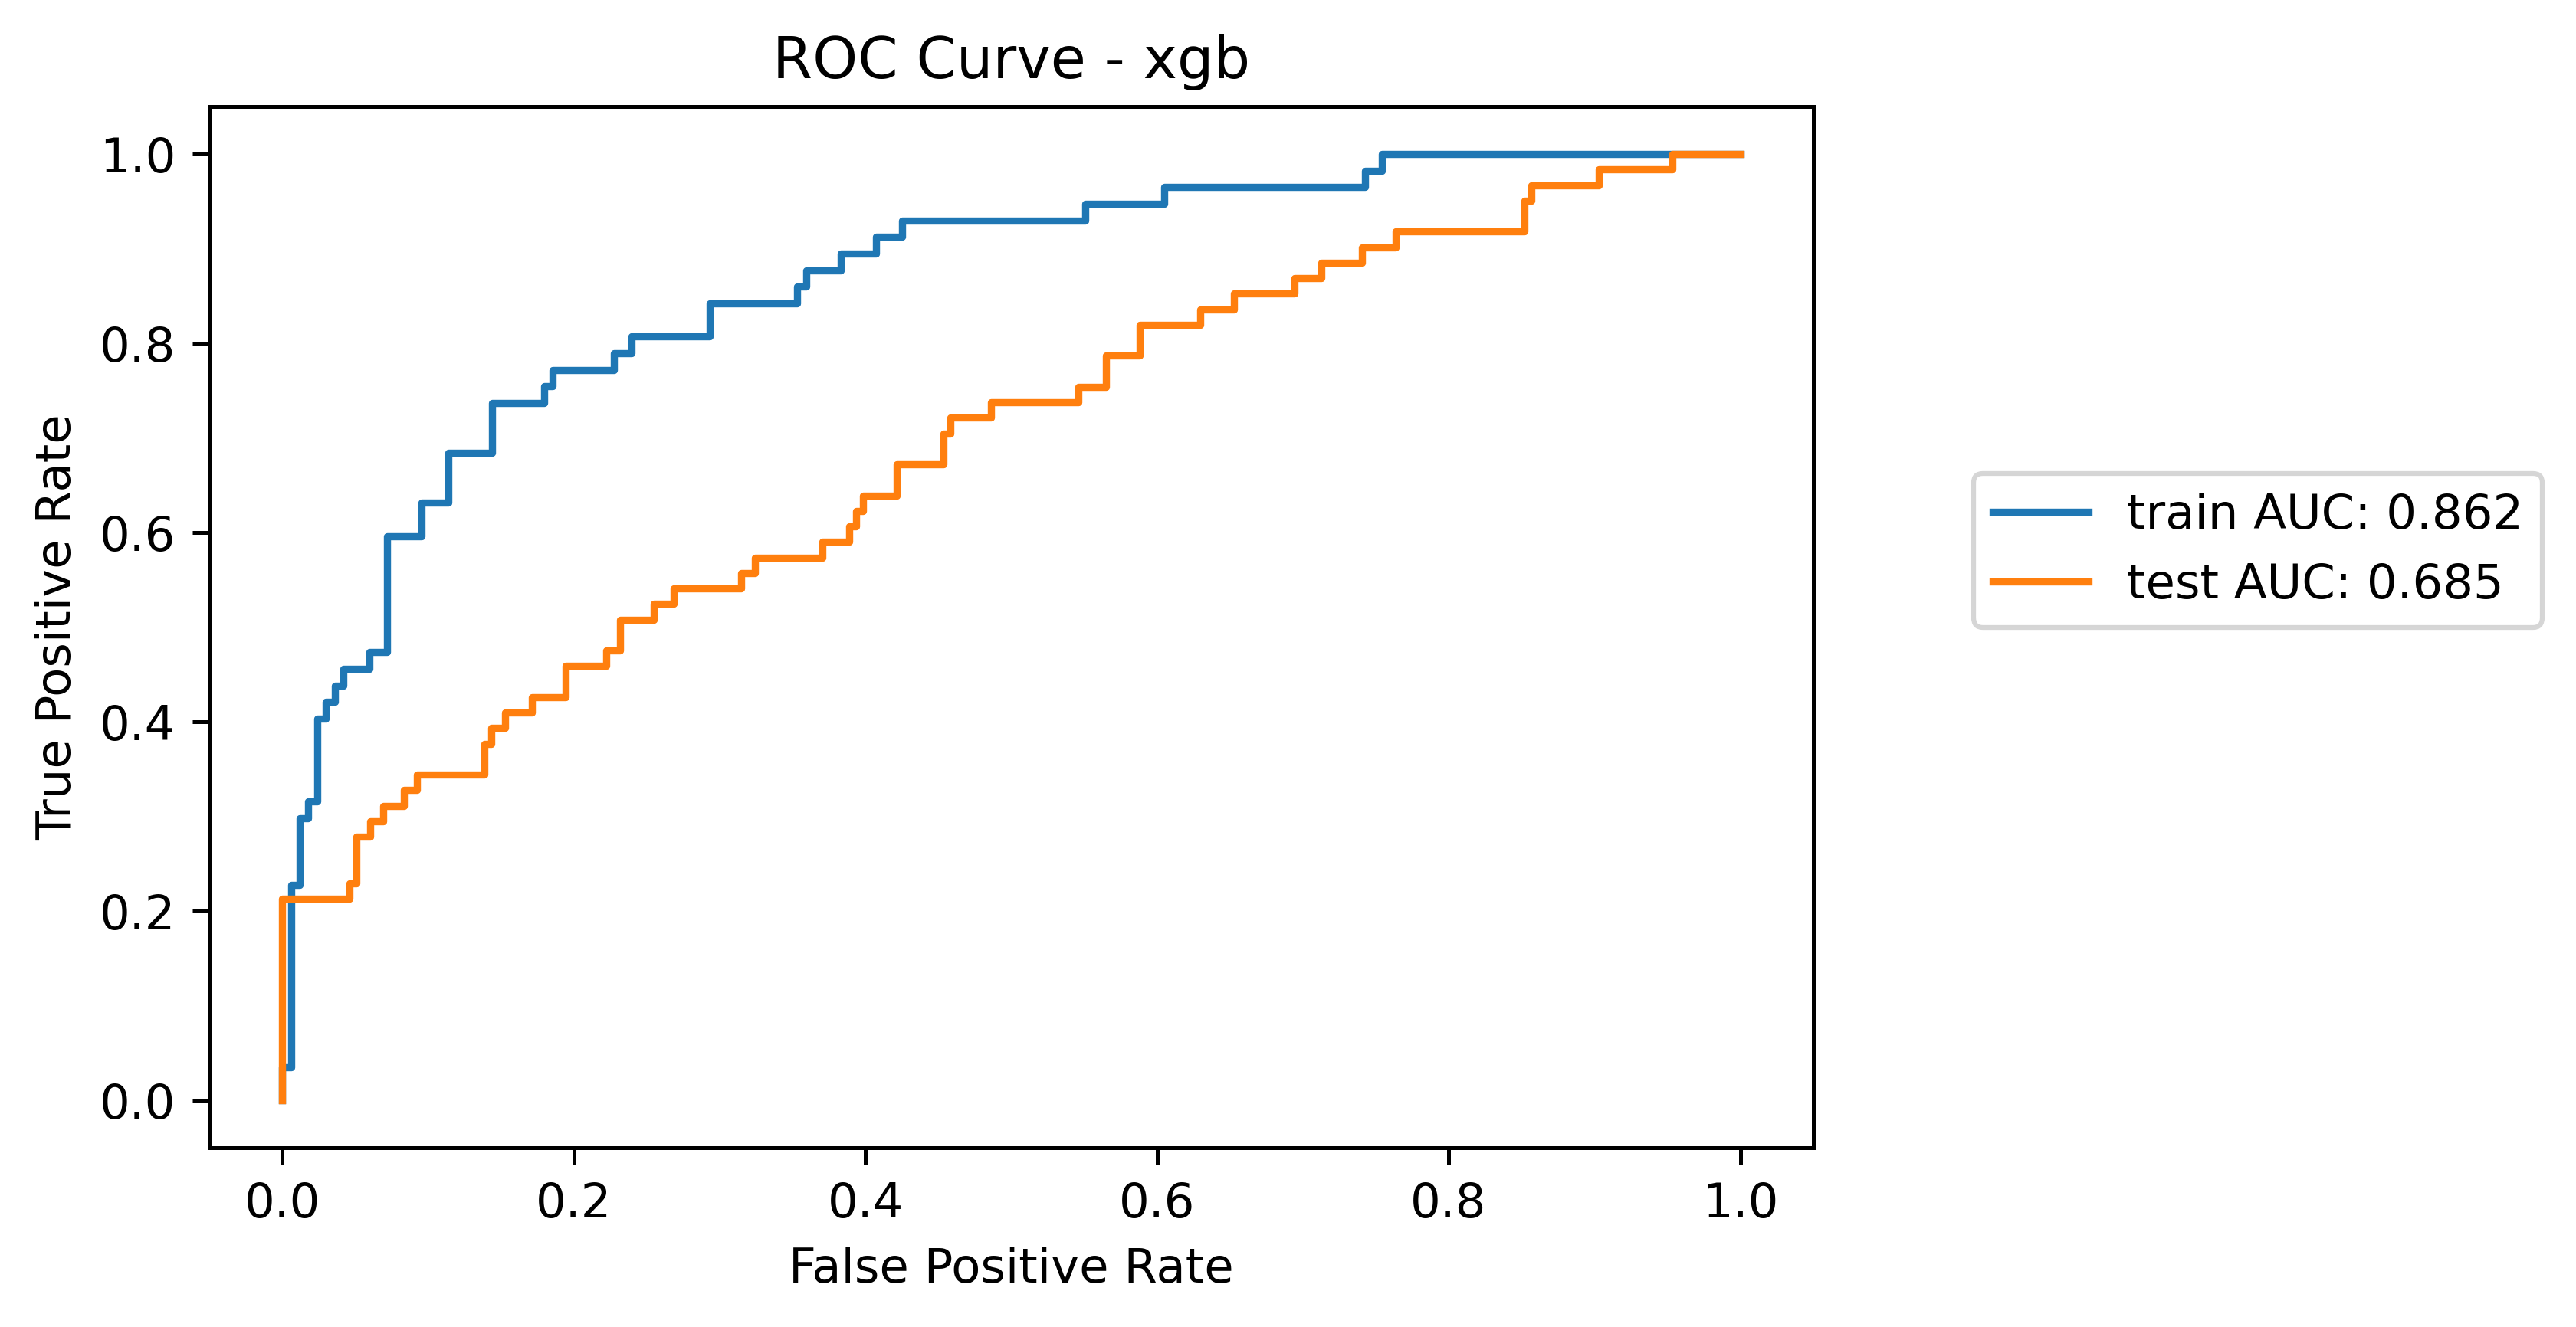

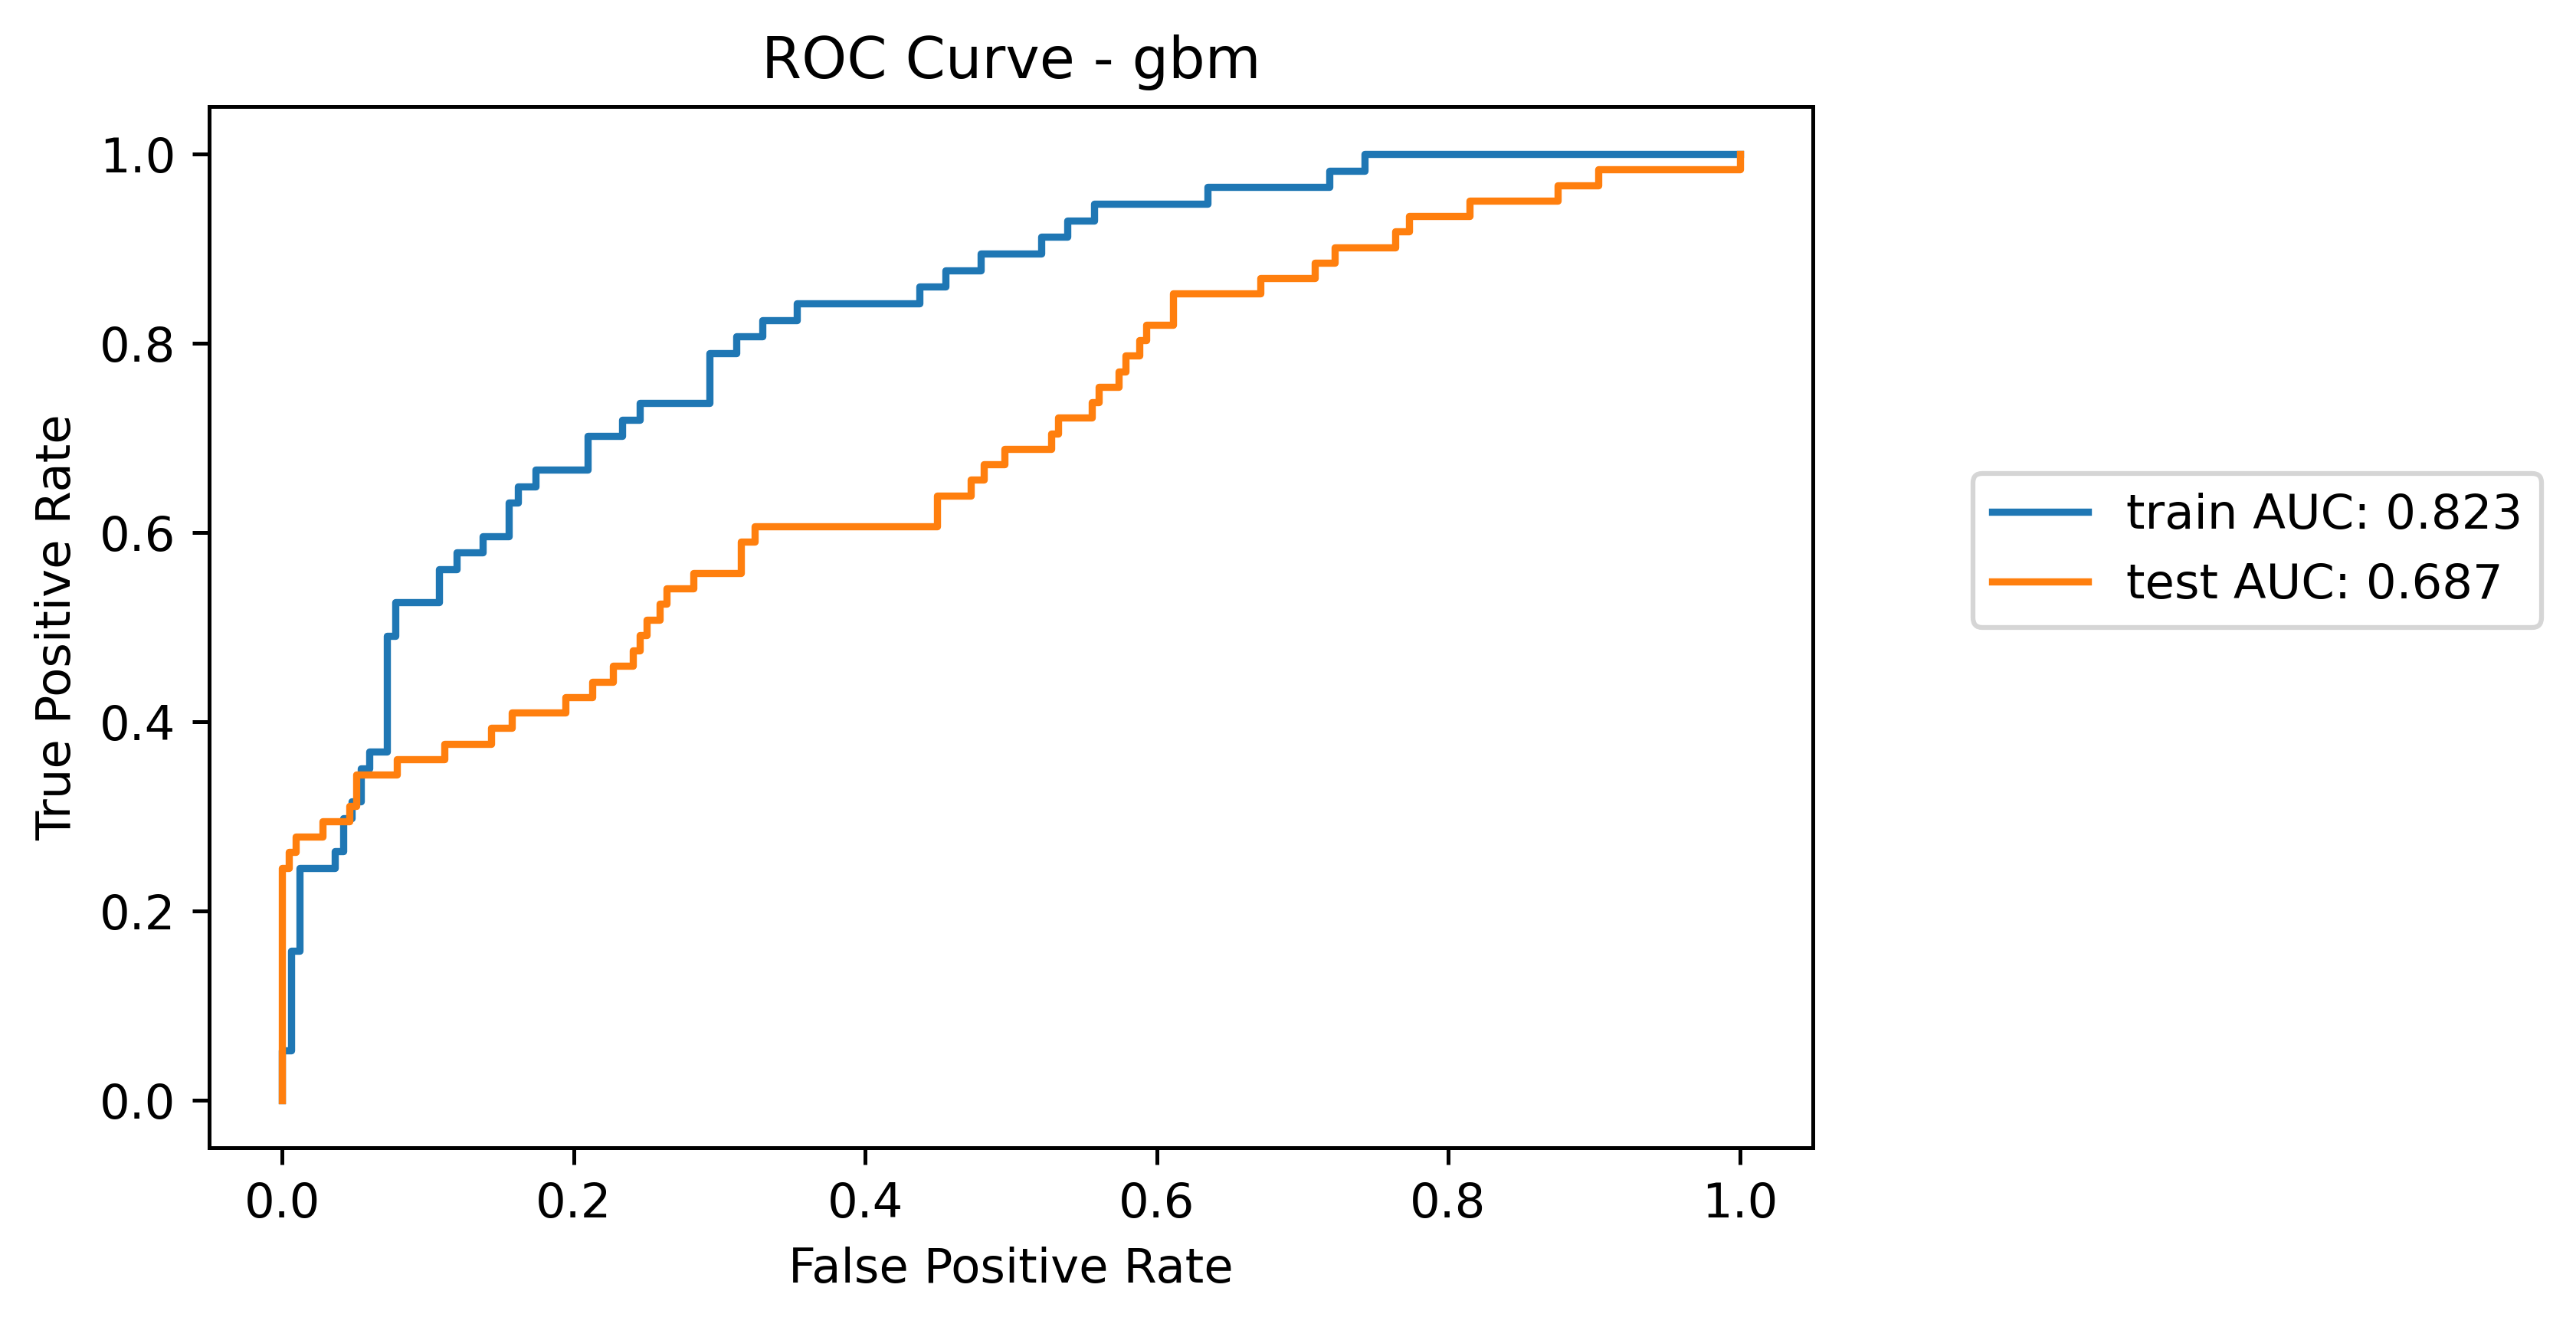

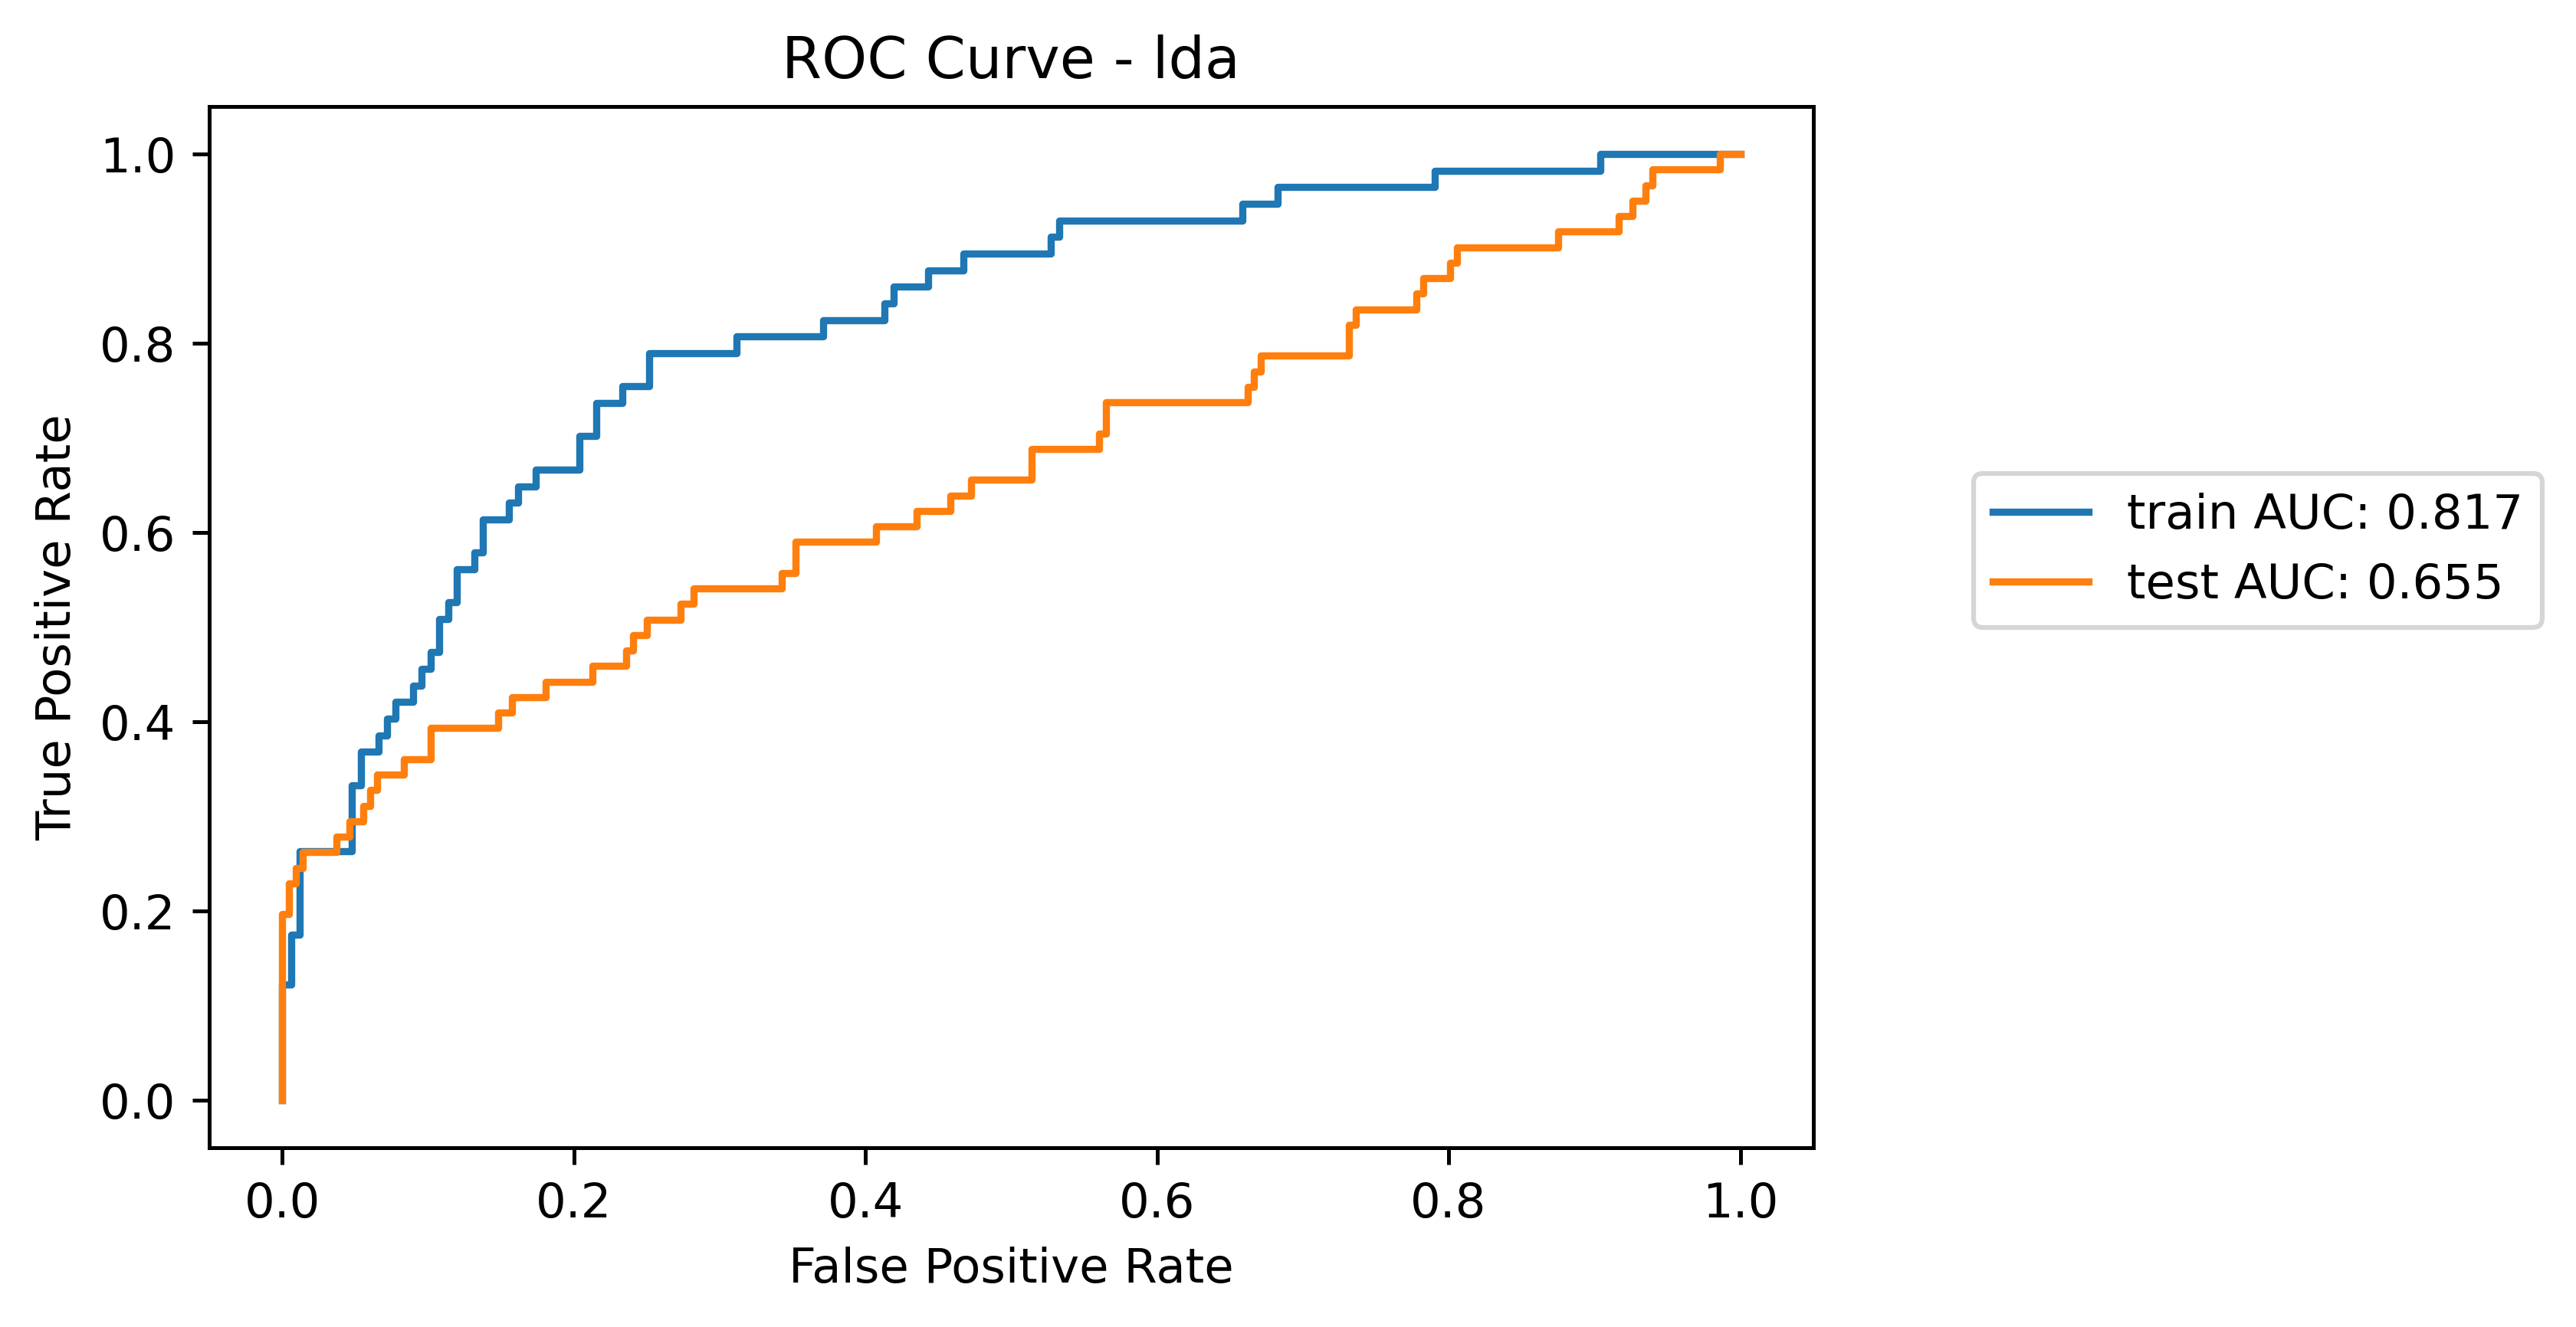

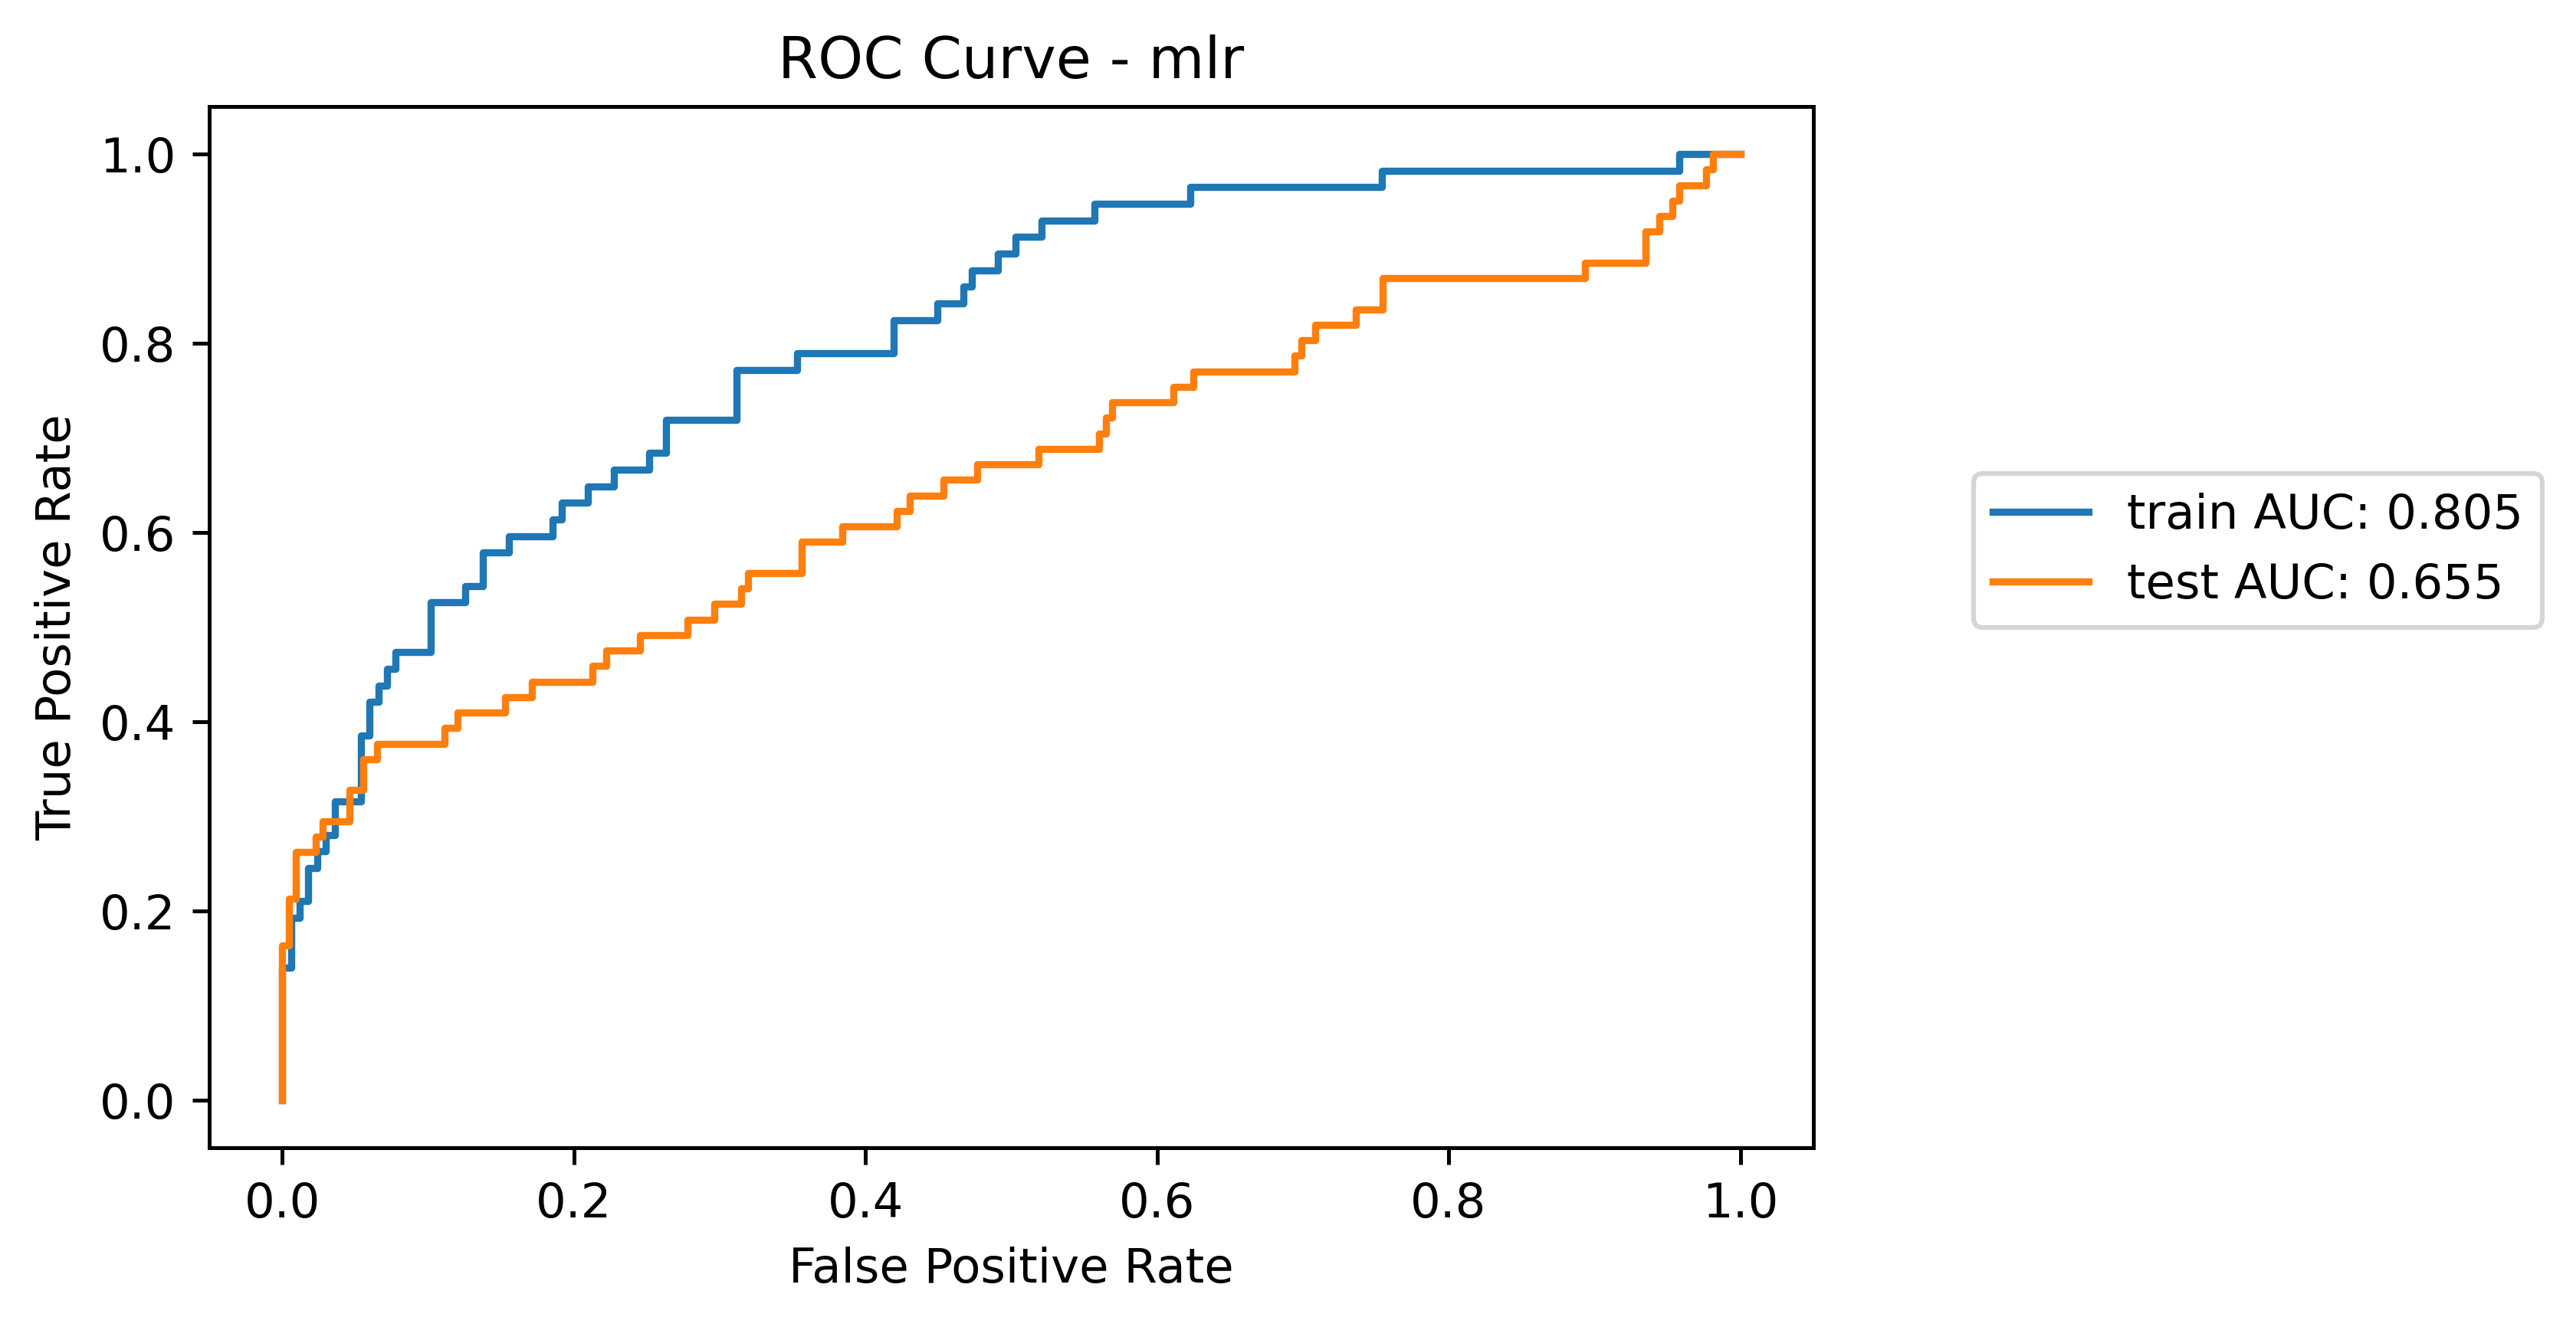

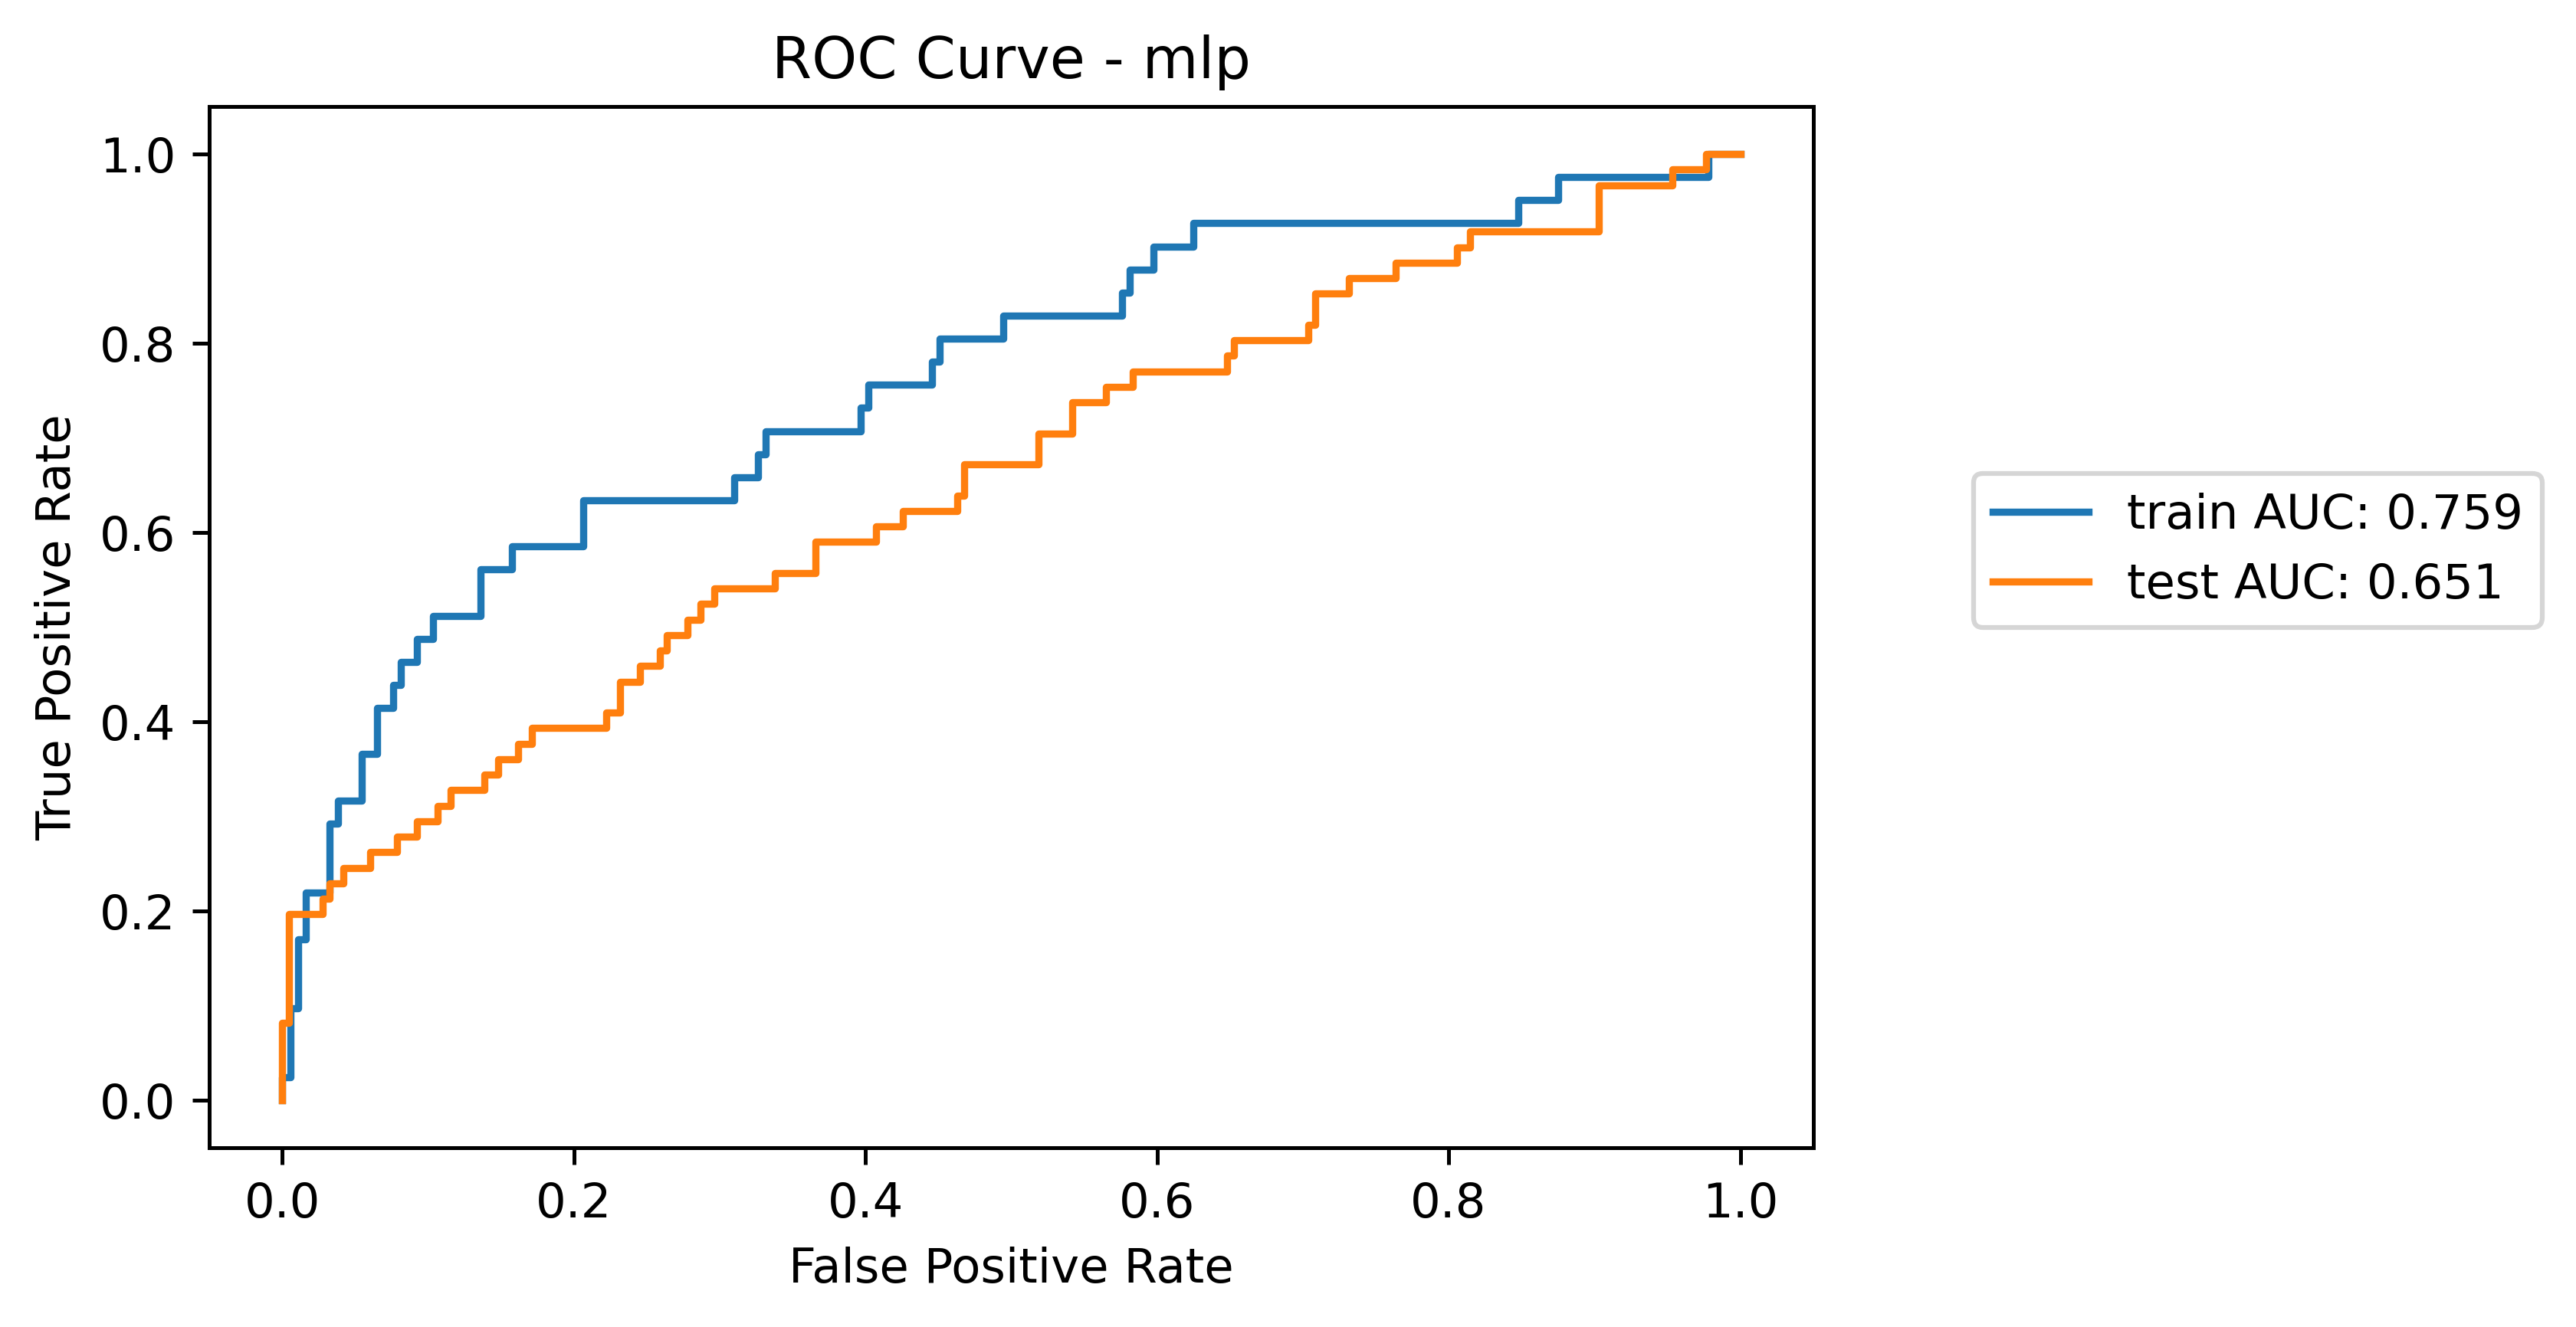

In [53]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="train AUC: "+str(round(xgb_auc_test,3)))
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="test AUC: "+str(round(xgb_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - xgb')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="train AUC: "+str(round(gbm_auc_test,3)))
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="test AUC: "+str(round(gbm_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - gbm')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(lda_fpr_test, lda_tpr_test, label="train AUC: "+str(round(lda_auc_test,3)))
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="test AUC: "+str(round(lda_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - lda')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="train AUC: "+str(round(mlr_auc_test,3)))
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="test AUC: "+str(round(mlr_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - mlr')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="train AUC: "+str(round(mlp_auc_test,3)))
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="test AUC: "+str(round(mlp_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - mlp')
    plt.legend(loc = (1.1,0.5))
    plt.show()